<a href="https://colab.research.google.com/github/dkd99/Cardiovascular-Risk-prediction/blob/main/Welcome_To_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.Variables

> Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.
Data Description

> Demographic:

> • Sex: male or female("M" or "F")

> • Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

>Behavioral

> • is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

> • Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

> Medical( history)

> • BP Meds: whether or not the patient was on blood pressure medication (Nominal)


> • Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

> • Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

> • Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)

> • Tot Chol: total cholesterol level (Continuous)

> • Sys BP: systolic blood pressure (Continuous)

> • Dia BP: diastolic blood pressure (Continuous)

> • BMI: Body Mass Index (Continuous)

> • Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though infact discrete, yet are considered continuous because of large number of possible values.)

> • Glucose: glucose level (Continuous)

> Predict variable (desired target)

> • 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score,recall_score,precision_score,classification_report
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,StackingClassifier
from xgboost import XGBClassifier
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [227]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 66 kB/s 


In [228]:
import catboost as cb

In [4]:
df=pd.read_csv("/content/drive/MyDrive/csv files/data_cardiovascular_risk.csv")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Data introduction-**

Taking a look at our data-

In [5]:
df.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

Shape of our data-

In [6]:
df.shape

(3390, 17)

We have 3390 rows(observations) and and 17 columns(features)-

Lets look at data type and number of null values(missing observations) for each feature-

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

Number of null values w.r.t each feature-

In [8]:
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

What percentage of data is missing for different features-

In [9]:
# Missing Value Count Function
def show_missing():
    missing = df.columns[df.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(df[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(df[show_missing()].isnull().sum().sort_values(ascending = False)/len(df)*100,2))

Missing Data Count
glucose       304
education      87
BPMeds         44
totChol        38
cigsPerDay     22
BMI            14
heartRate       1
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
glucose       8.97
education     2.57
BPMeds        1.30
totChol       1.12
cigsPerDay    0.65
BMI           0.41
heartRate     0.03
dtype: float64


So we can see glucose feature is having highest number of missing observations followed by feature education-

Lets look at description of our dataset-

In [10]:
df.describe()

id          age    education   cigsPerDay       BPMeds  \
count  3390.000000  3390.000000  3303.000000  3368.000000  3346.000000   
mean   1694.500000    49.542183     1.970936     9.069477     0.029886   
std     978.753033     8.592878     1.019081    11.879078     0.170299   
min       0.000000    32.000000     1.000000     0.000000     0.000000   
25%     847.250000    42.000000     1.000000     0.000000     0.000000   
50%    1694.500000    49.000000     2.000000     0.000000     0.000000   
75%    2541.750000    56.000000     3.000000    20.000000     0.000000   
max    3389.000000    70.000000     4.000000    70.000000     1.000000   

       prevalentStroke  prevalentHyp     diabetes      totChol       sysBP  \
count      3390.000000   3390.000000  3390.000000  3352.000000  3390.00000   
mean          0.006490      0.315339     0.025664   237.074284   132.60118   
std           0.080309      0.464719     0.158153    45.247430    22.29203   
min           0.000000      0.000000     0.000000   107.000000    83.50000   
25%           0.000000      0.000000     0.000000   206.000000   117.00000   
50%           0.000000      0.000000     0.000000   234.000000   128.50000   
75%           0.000000      1.000000     0.000000   264.000000   144.00000   
max           1.000000      1.000000     1.000000   696.000000   295.00000   

             diaBP          BMI    heartRate      glucose   TenYearCHD  
count  3390.000000  3376.000000  3389.000000  3086.000000  3390.000000  
mean     82.883038    25.794964    75.977279    82.086520     0.150737  
std      12.023581     4.115449    11.971868    24.244753     0.357846  
min      48.000000    15.960000    45.000000    40.000000     0.000000  
25%      74.500000    23.020000    68.000000    71.000000     0.000000  
50%      82.000000    25.380000    75.000000    78.000000     0.000000  
75%      90.000000    28.040000    83.000000    87.000000     0.000000  
max     142.500000    56.800000   143.000000   394.000000     1.000000

From description of our data ,we can see our dataset has 15 numerical features out of 17 features.We can have a look at mean,median,standard deviation,mean of these features.

In [11]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

We have following continous or discrete numerical features -


In [12]:
continous_features=['age','cigsPerDay','totChol', 'sysBP','diaBP', 'BMI', 'heartRate', 'glucose']

We have following nominal and ordinal features-

In [13]:
nominal_features=[i for i in df.columns.tolist() if i not in (continous_features+['id']) ]

In [14]:
nominal_features

['education',
 'sex',
 'is_smoking',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'TenYearCHD']

In [15]:
numerical_features=df.describe().columns.tolist()

Counting different values for nominal or ordinal features-

In [16]:
for i in nominal_features:
  print(f'value count for {i} is :\n',df[i].value_counts())

value count for education is :
 1.0    1391
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64
value count for sex is :
 F    1923
M    1467
Name: sex, dtype: int64
value count for is_smoking is :
 NO     1703
YES    1687
Name: is_smoking, dtype: int64
value count for BPMeds is :
 0.0    3246
1.0     100
Name: BPMeds, dtype: int64
value count for prevalentStroke is :
 0    3368
1      22
Name: prevalentStroke, dtype: int64
value count for prevalentHyp is :
 0    2321
1    1069
Name: prevalentHyp, dtype: int64
value count for diabetes is :
 0    3303
1      87
Name: diabetes, dtype: int64
value count for TenYearCHD is :
 0    2879
1     511
Name: TenYearCHD, dtype: int64


We can see from above analysis that Diabetes ,BPmeds and Prevalent stroke have huge dispairity in different type of values.

Even our dependent variable have huge class imbalance,which we will try to balance using SMOTE techniqe.

**Null values treatment-**

Lets look at distribution of glucose feature so that we can decide what value we can fill up in place of null values- 

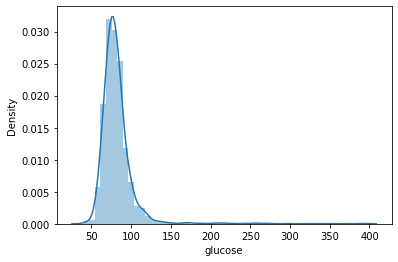

In [17]:
sns.distplot(df['glucose'])

We have seen before that percentage of null values for each feature isless than 10 % .Which means if we fill up null values with mean or median or mode based on distribution it won't create bias in our result.

In [18]:
df['glucose'].isnull().sum()

304

In this case ,we can fill up null values with median values.

In [19]:
df['glucose']=df['glucose'].fillna(df['glucose'].median())

In [20]:
df['glucose'].isnull().sum()

0

Taking a look at log transformation of distribution of glucose feature.

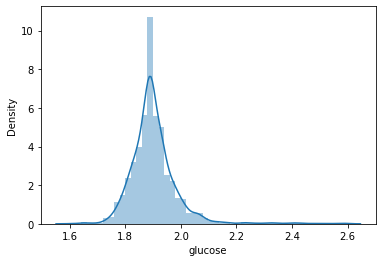

In [21]:
sns.distplot(np.log10(df['glucose']))

Body mass index feature values follow following distribution.

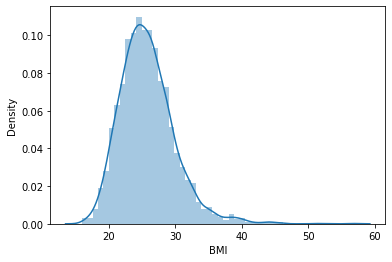

In [22]:
sns.distplot(df['BMI'])

In [23]:
df['BMI'].isnull().sum()

14

Filling up null values with median values of BMI feature values.

In [24]:
df['BMI']=df['BMI'].fillna(df['BMI'].median())

In [25]:
df['BMI'].isnull().sum()

0

Let's look at log transformation of BMI feature values distribution .

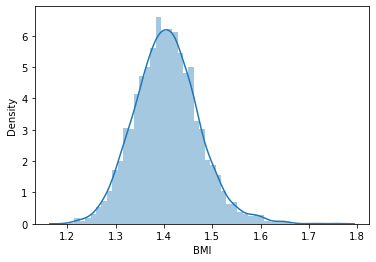

In [26]:
sns.distplot(np.log10(df['BMI']))

In [27]:
df['glucose'].isnull().sum()

0

Lets look at how many people smoke and how much cigarattesdo smokers smoke in a day.

In [28]:
len(df[df['cigsPerDay']==0]['cigsPerDay'])

1703

Out of 3390 observations,1703 people don't  smoke .

In [29]:
len(df[df['cigsPerDay']!=0]['cigsPerDay'])

1687

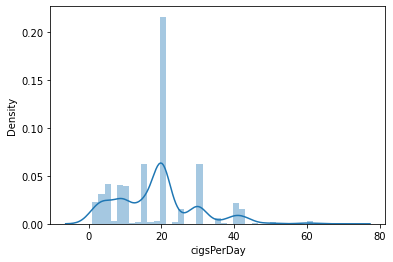

In [30]:
sns.distplot(df[df['cigsPerDay']!=0]['cigsPerDay'])

Since more than 50% people don't smoke ,we can fill up 22 missing values with mode values.

In [31]:
df['cigsPerDay']=df['cigsPerDay'].fillna(0)

In [32]:
df['cigsPerDay'].isnull().sum()

0

In [33]:
df[df['is_smoking']=='NO']['cigsPerDay'].mean()

0.0

In education feature,we can fill up null values with mode value.

In [34]:
df['education']=df['education'].fillna(1)

In [35]:
df['education'].isnull().sum()

0

In [36]:
df['BPMeds']=df['BPMeds'].fillna(0.0)

In [37]:
df['BPMeds'].isnull().sum()

0

**Totchol:**

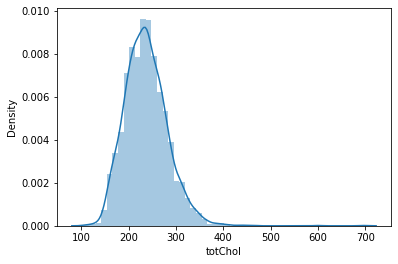

In [38]:
sns.distplot(df['totChol'])

we can fill this features null values with median values.

In [39]:
df['totChol']=df['totChol'].fillna(df['totChol'].median())

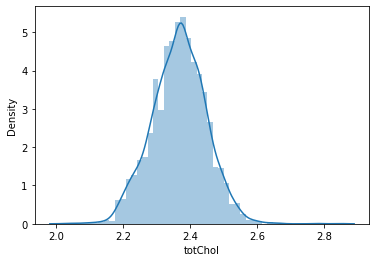

In [40]:
sns.distplot(np.log10(df['totChol']))

**Heart rate:**

Heart rate has only 1 missing value and it can be filled up with mean value.

In [41]:
df['heartRate']=df['heartRate'].fillna(df['heartRate'].mean())

In [42]:
df.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

**EDA:**

Lets look at the distributions of continous/discrete numerical features-

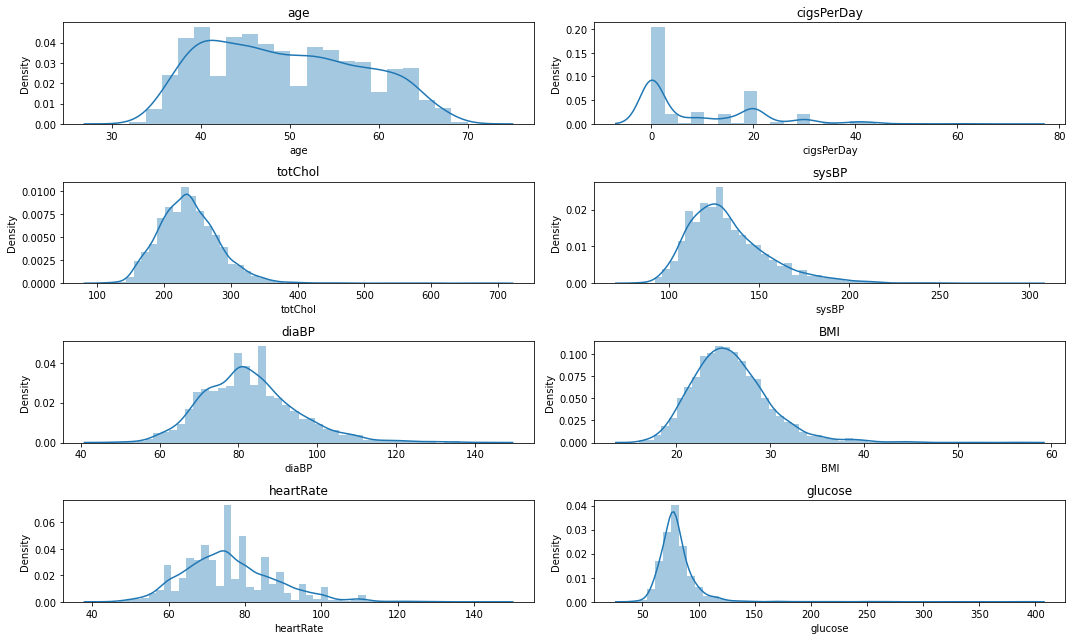

In [43]:
n=1
plt.figure(figsize=(15,9))
for i in continous_features:
  plt.subplot(4,2,n)
  n=n+1
  sns.distplot(df[i])
  plt.title(i)
  plt.tight_layout()
 


**AGE-** we have data for people having age between 32 to 70 with mean age being around 49 years.

**Cigarettes per day-** most people don't smoke any cigaratte in a day but those who smoke may smoke from 1 to 70 cigarettes with mean smoked cigarettes   being around 9.

**Totchol-** Total cholestrol value has mean value of 237 with minimum being 107 and max 690.


**Sys BP-** Normal: Below 120

> Elevated: 120-129

> Stage 1 high blood pressure (also called hypertension): 130-139

> Stage 2 hypertension: 140 or more

> Hypertensive crisis: 180 or more

> In our data ,we have systolic bp distributed between 83.5 to 295 with mean being 132.




**dia BP-** This is what your diastolic blood pressure number means:


> Normal: Lower than 80


> Stage 1 hypertension: 80-89

> Stage 2 hypertension: 90 or more

> Hypertensive crisis: 120 or more

> In our data,We have diaBP values distributed between 48 to 142.5 with mean value being 83.



**BMI-** Category	BMI range - kg/m2

> Severe Thinness	< 16

> Moderate Thinness	16 - 17

> Mild Thinness	17 - 18.5

> Normal	18.5 - 25

> Overweight	25 - 30

> Obese Class I	30 - 35

> Obese Class II	35 - 40

> Obese Class III	> 40

We have BMI index values ranging between 15.96 to 57 with mean value being 25.79.

**heartrate-** A normal resting heart rate for adults ranges from 60 to 100 beats per minute.


> In our data we have heart rate values ranging from 45 to 143 with mean value being 76.



**Glucose-** 
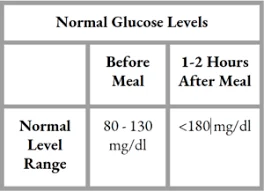

In our data, we have glucose ranging from 40 to 394 with mean value being 82.

**We can see from the above distribution charts that most of the continous numerical features are normally distributed with few outliers.**

Lets draw histogram for continous/discrete numerical features-

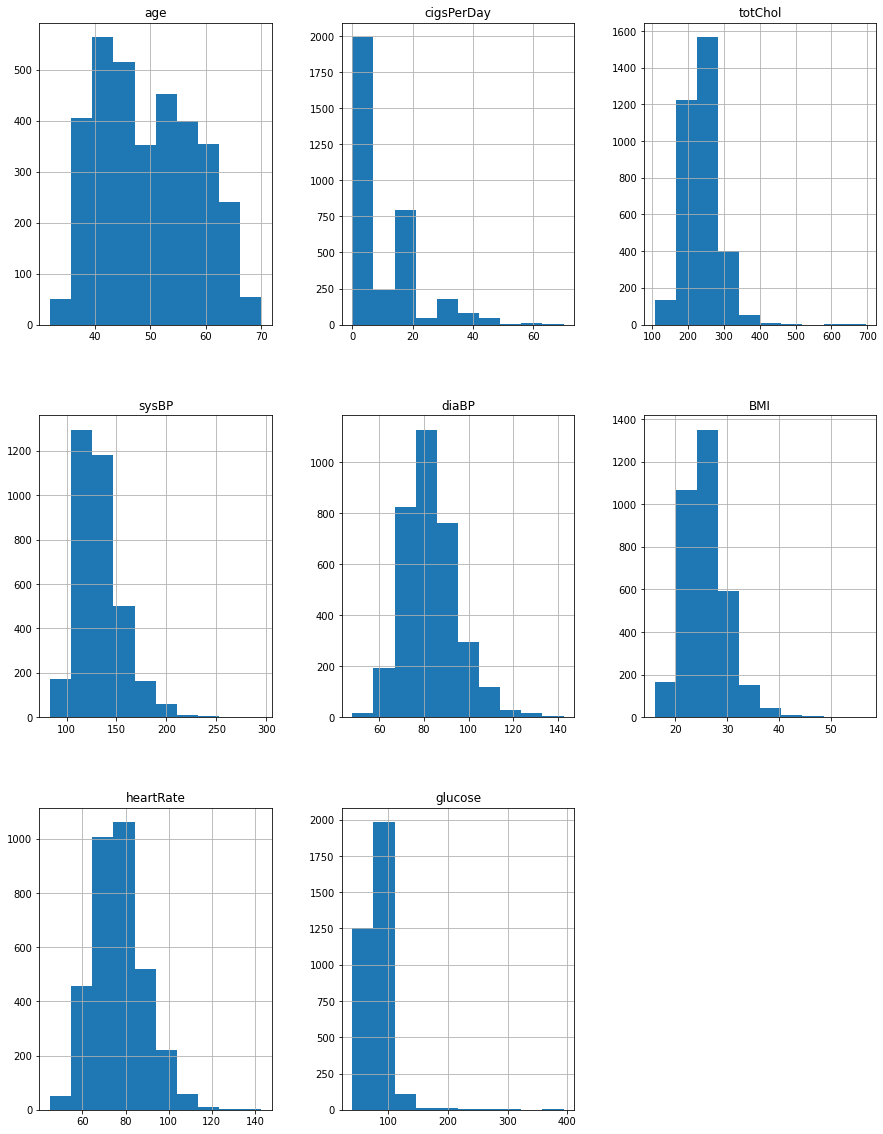

In [44]:
# understanding distribution of data before imputation
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df[continous_features].hist(ax = ax)
plt.show()

Lets draw box plots for continous or discrte numerical features to have a look at some outliers.

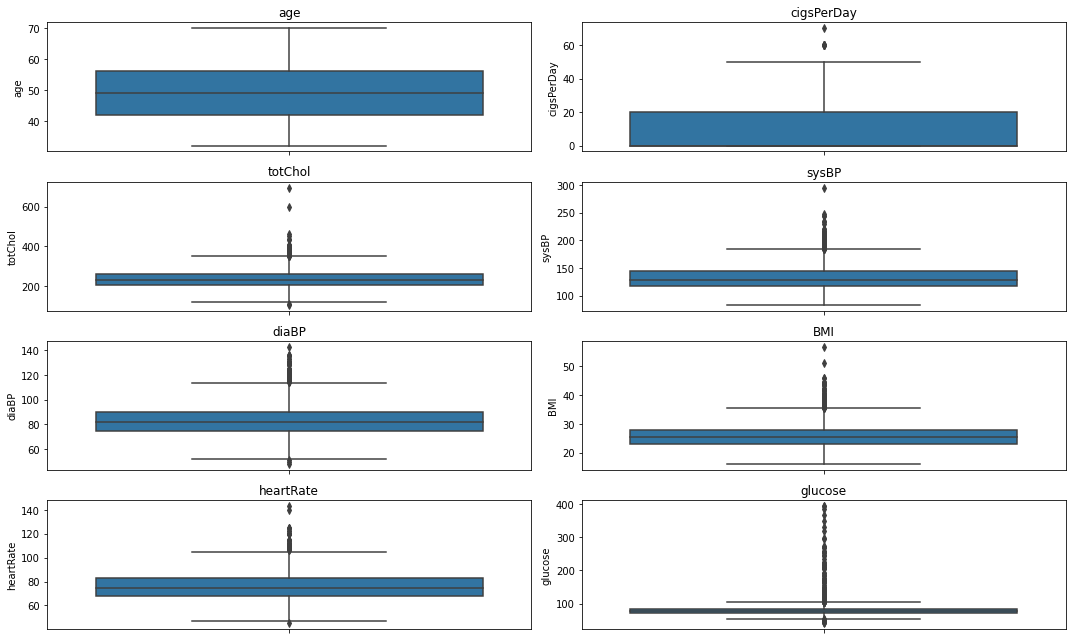

In [45]:
n=1
plt.figure(figsize=(15,9))
for i in continous_features:
  plt.subplot(4,2,n)
  n=n+1
  sns.boxplot(y=df[i])
  plt.title(i)
  plt.tight_layout()

we can see some people have unusually high/low totchol,sysBP,BMI,diaBP,heartrate ,glucose.

**Lets draw countplots for nominal/ordinal features.**

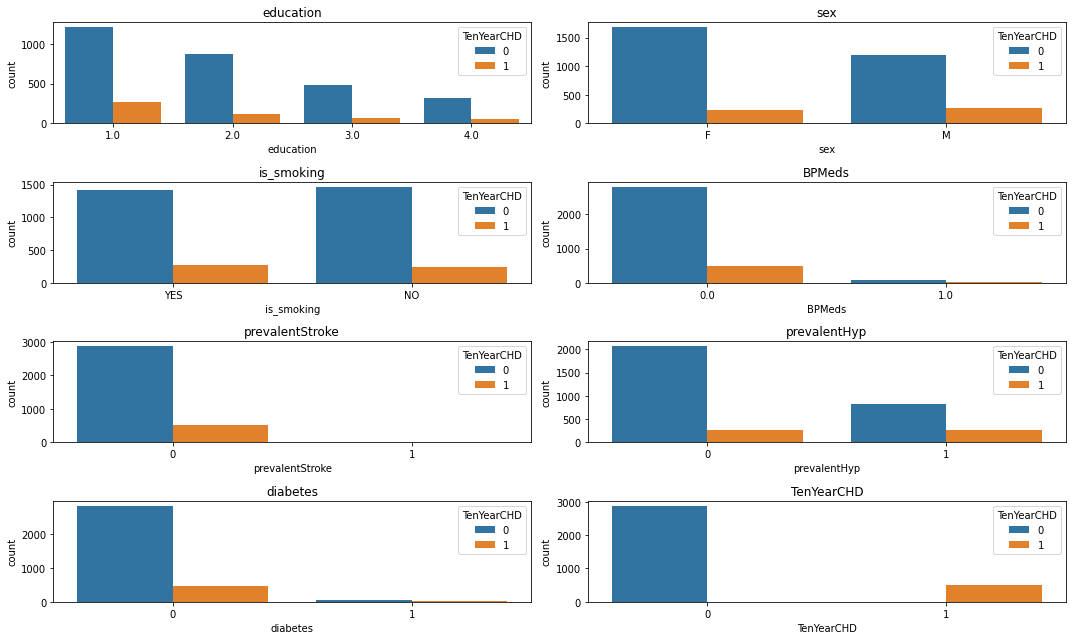

In [46]:
n=1
plt.figure(figsize=(15,9))
for i in nominal_features:
  plt.subplot(4,2,n)
  n=n+1
  sns.countplot(x=i,hue='TenYearCHD',data=df)
  plt.title(i)
  plt.tight_layout()

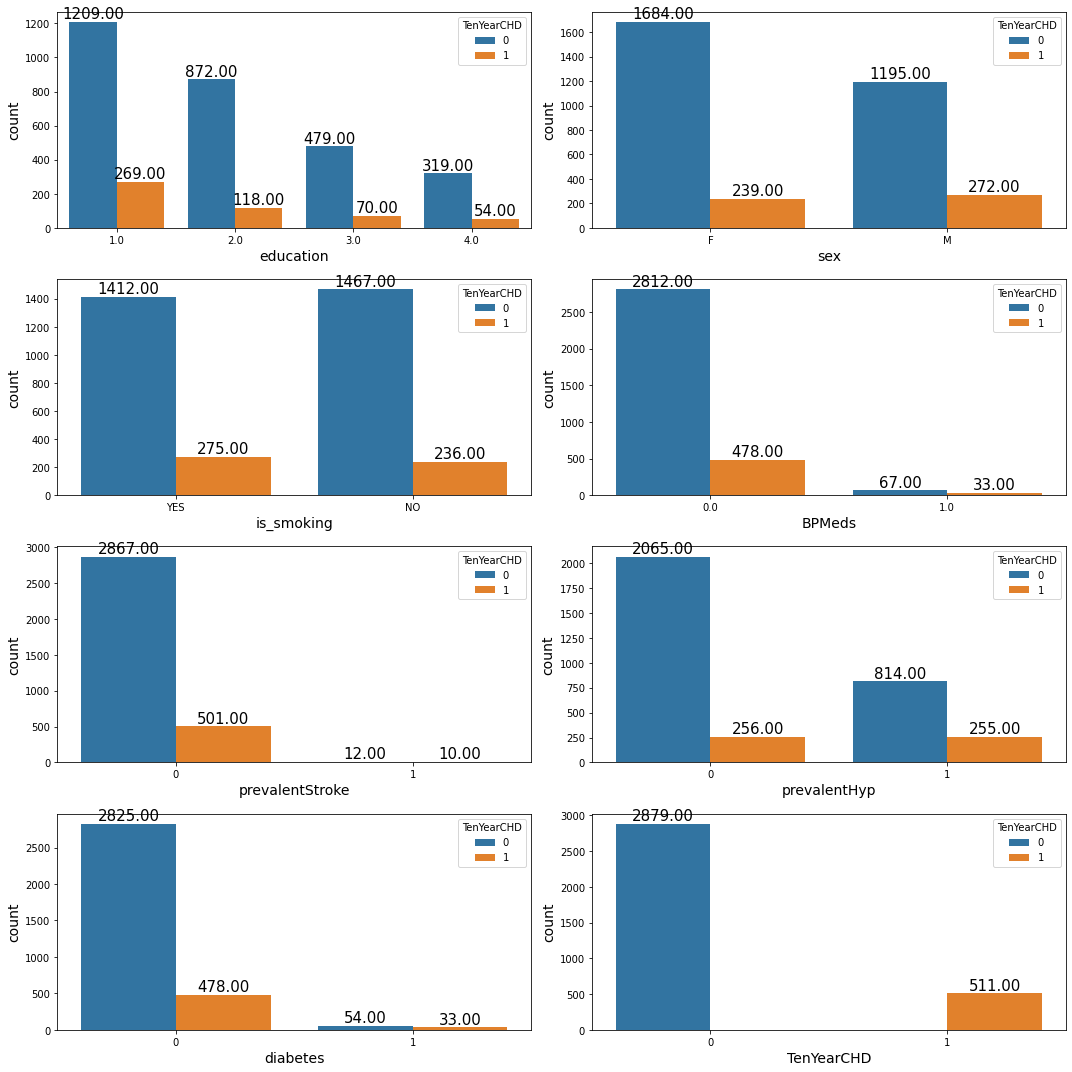

In [47]:
n=1
# Defining the plot size
plt.figure(figsize=(15, 15))
for i in nominal_features:
  plt.subplot(4,2,n)
  n=n+1
  

  # Defining the values for x-axis, y-axis
  # and from which dataframe the values are to be picked
  plots = sns.countplot(x=i, hue="TenYearCHD", data=df)

  # Iterrating over the bars one-by-one
  for bar in plots.patches:
    # Using Matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    # x-coordinate: bar.get_x() + bar.get_width() / 2
    # y-coordinate: bar.get_height()
    # free space to be left to make graph pleasing: (0, 8)
    # ha and va stand for the horizontal and vertical alignment
	  plots.annotate(format(bar.get_height(), '.2f'),
				(bar.get_x() + bar.get_width() / 2,
					bar.get_height()), ha='center', va='center',
				size=15, xytext=(0, 8),
				textcoords='offset points')

  # Setting the label for x-axis
  plt.xlabel(i, size=14)

  # Setting the label for y-axis
  plt.ylabel('count', size=14)
  plt.tight_layout()


Countplot w.r.t different ordinal/nominal features divided based on weather had CHD or not showing  percentage annotations.Percentage based on how many people has CHD and not had CHD in respective subcategory.

<Figure size 1080x1080 with 0 Axes>

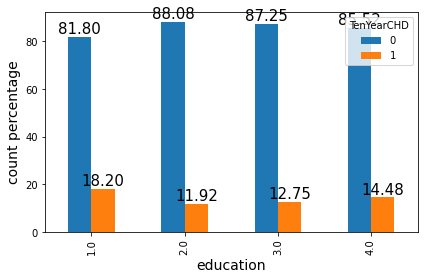

<Figure size 1080x1080 with 0 Axes>

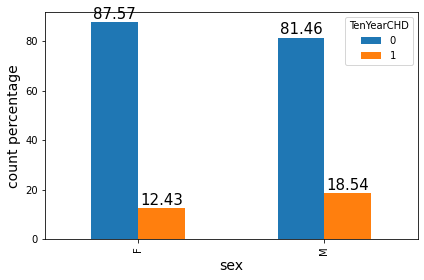

<Figure size 1080x1080 with 0 Axes>

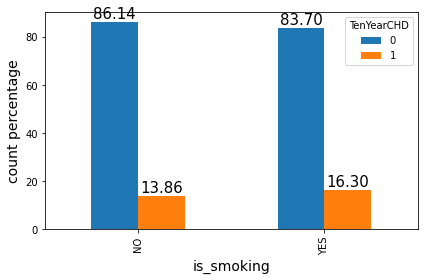

<Figure size 1080x1080 with 0 Axes>

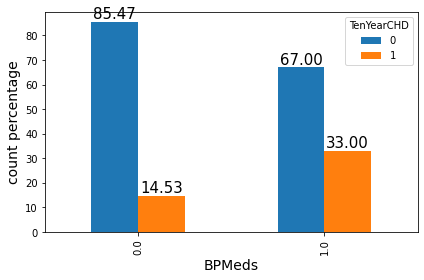

<Figure size 1080x1080 with 0 Axes>

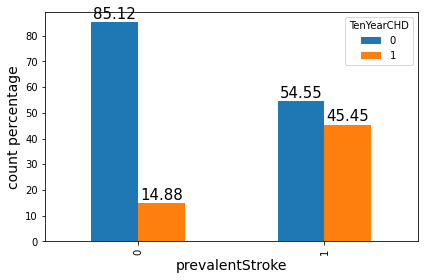

<Figure size 1080x1080 with 0 Axes>

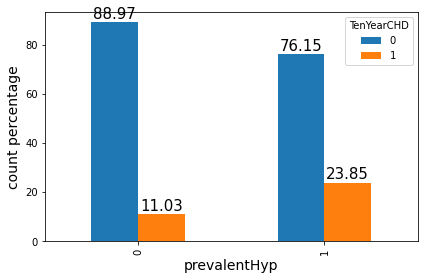

<Figure size 1080x1080 with 0 Axes>

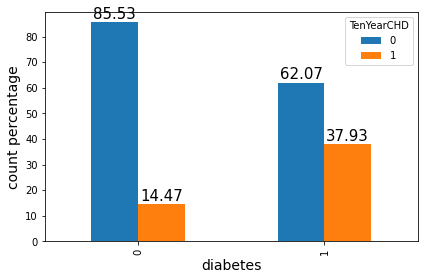

In [48]:
for i in nominal_features[:7]:
  
  plt.figure(figsize=(15, 15))
  
  

  # Defining the values for x-axis, y-axis
  # and from which dataframe the values are to be picked
  totals = df[[i,'TenYearCHD']].groupby([i,'TenYearCHD']).size().unstack('TenYearCHD').sum(axis=1)
  plots = ((df[[i,'TenYearCHD']].groupby([i,'TenYearCHD']).size().unstack('TenYearCHD').T/totals).T*100).plot(kind='bar')

  # Iterrating over the bars one-by-one
  for bar in plots.patches:
    # Using Matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    # x-coordinate: bar.get_x() + bar.get_width() / 2
    # y-coordinate: bar.get_height()
    # free space to be left to make graph pleasing: (0, 8)
    # ha and va stand for the horizontal and vertical alignment
	  plots.annotate(format(bar.get_height(), '.2f'),
				(bar.get_x() + bar.get_width() / 2,
					bar.get_height()), ha='center', va='center',
				size=15, xytext=(0, 8),
				textcoords='offset points')

  # Setting the label for x-axis
  plt.xlabel(i, size=14)

  # Setting the label for y-axis
  plt.ylabel('count percentage', size=14)
  plt.tight_layout()


We can conclude following from the above countplots-

> 1)Males are more prone to CHD  as compared to females.

> 2)Smokers are more prone CHD as compared to non smokers though it makes only a little difference.

> 3)People on BP medications are more prone to CHD.

> 4)People who had any previous prevalent stroke are more prone to having CHD although people who had prevalant stroke they are very less.

> 5)Those who had prevhyp are more prone to having CHD.

> 6)Those who have diabetes are also more prone to having CHD although number of people who have diabetes are very less.

Lets analyse continous/discrete numerical features w.r.t CHD or not.

We will be drawing violin/boxplot to analyse this.

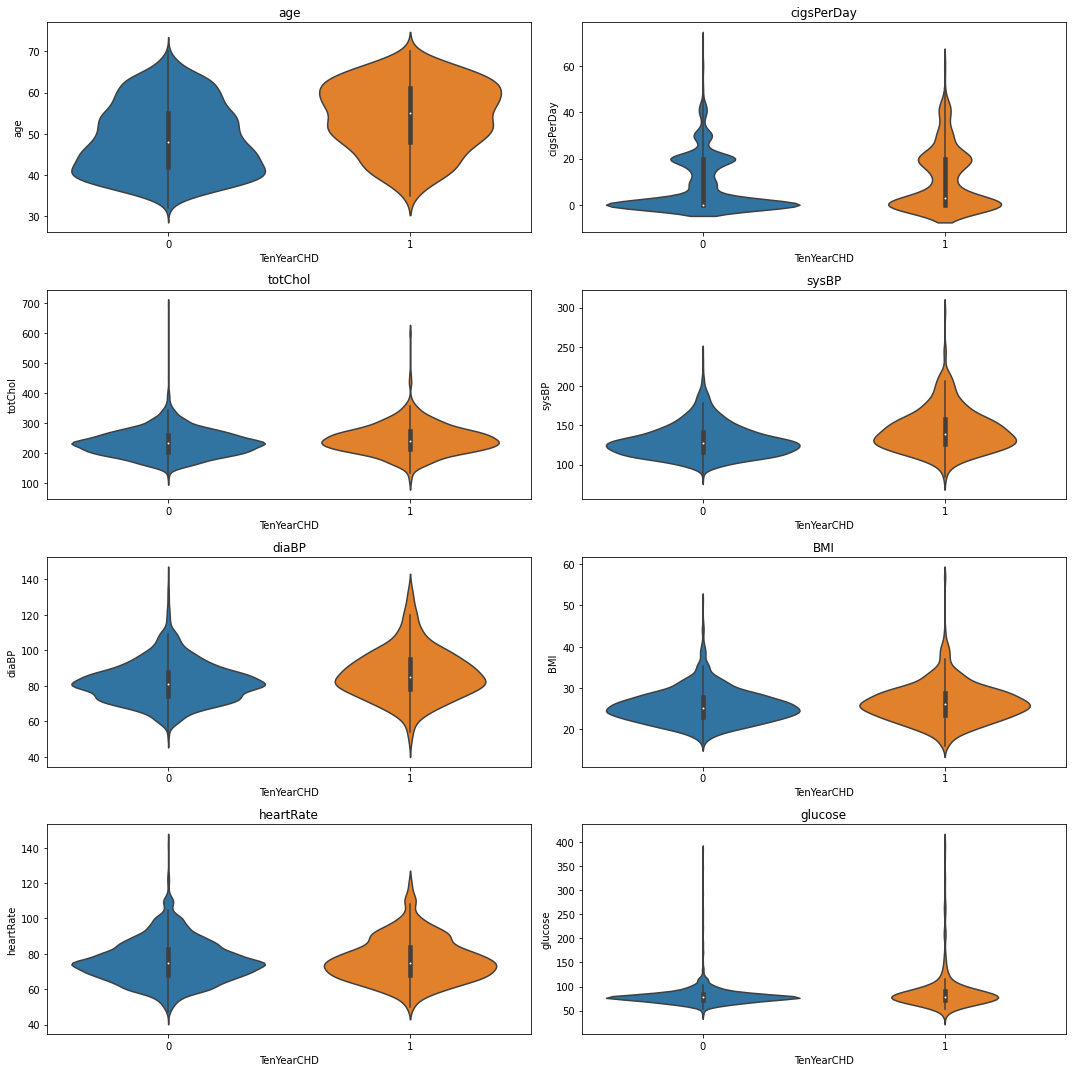

In [49]:
n=1
plt.figure(figsize=(15,15))
for i in continous_features:
  plt.subplot(4,2,n)
  n=n+1
  sns.violinplot(y=i,x='TenYearCHD',data=df)
  plt.title(i)
  plt.tight_layout()

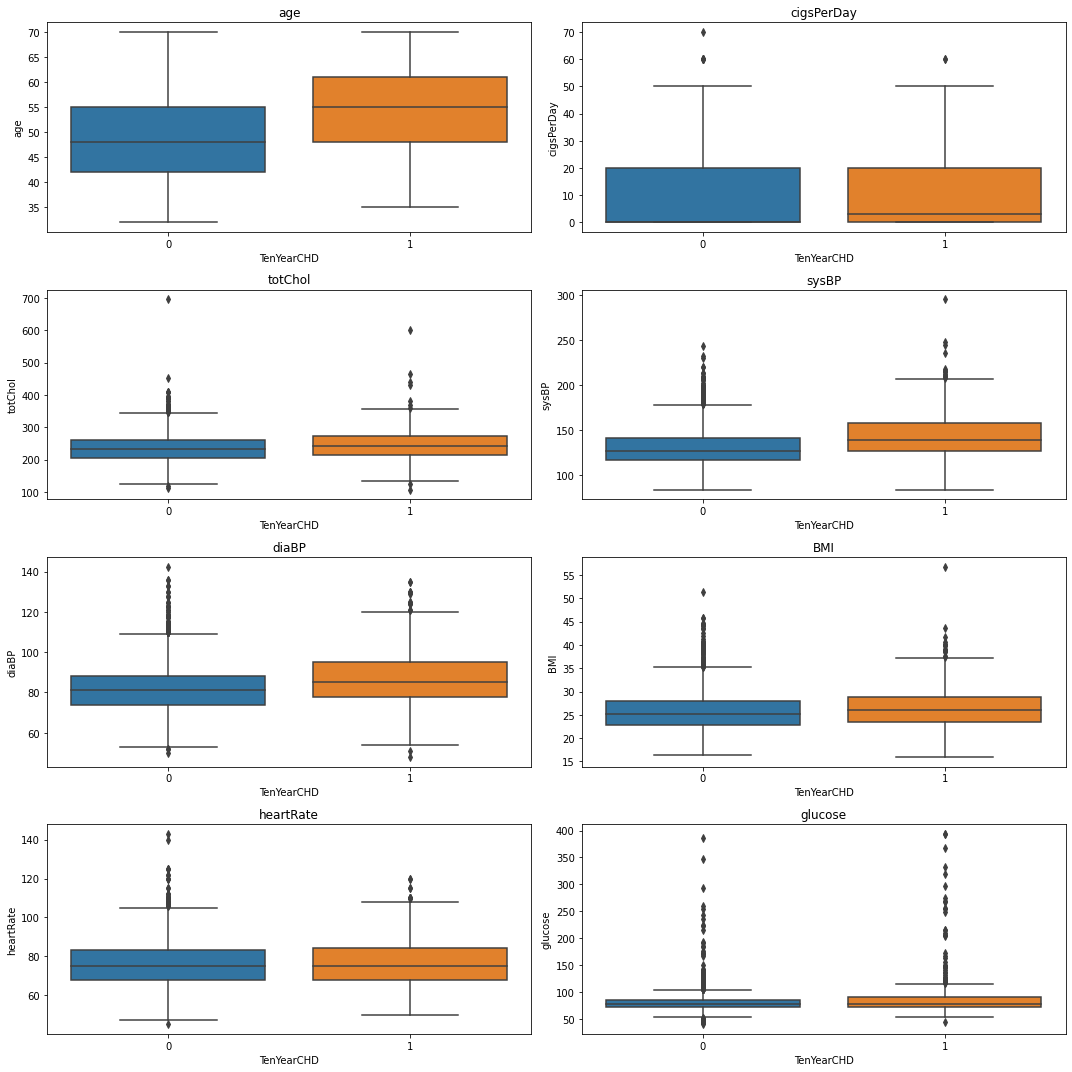

In [50]:
n=1
plt.figure(figsize=(15,15))
for i in continous_features:
  plt.subplot(4,2,n)
  n=n+1
  sns.boxplot(y=i,x='TenYearCHD',data=df)
  plt.title(i)
  plt.tight_layout()

We can conclude following from above graphs-

> 1)Median age of people who had CHD is higher as compared to people who don't have CHD.This implies that people having higher age are more prone to having CHD.

> 2)People who had CHD smoke more cigarettes as compared to people who had no CHD.

> 3)people who have CHD have more tot chol,sysBP,diaBP,BMI.

> 4)Heartrate and glucose levels have almost same median values for those who had CHD or not.








**Multicollinearity:**

Lets draw heatmap to know correlation coefficient between various parameters.

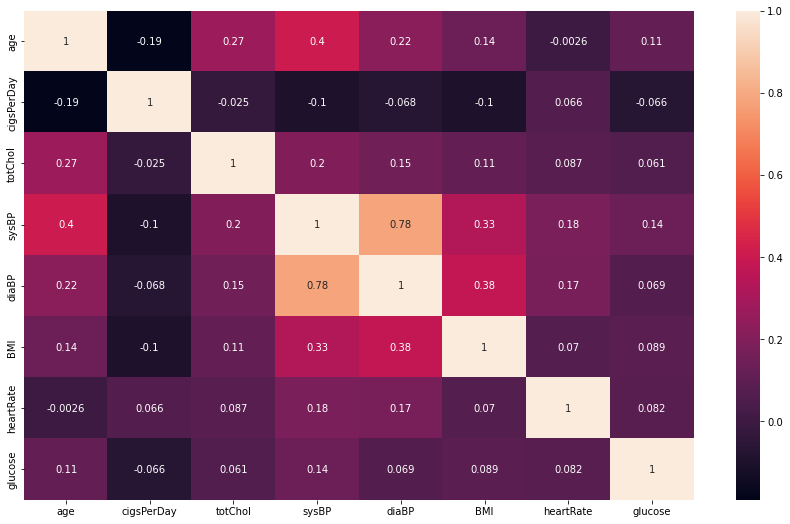

In [51]:
plt.figure(figsize=(15,9))
sns.heatmap(df[continous_features].corr(),annot=True)

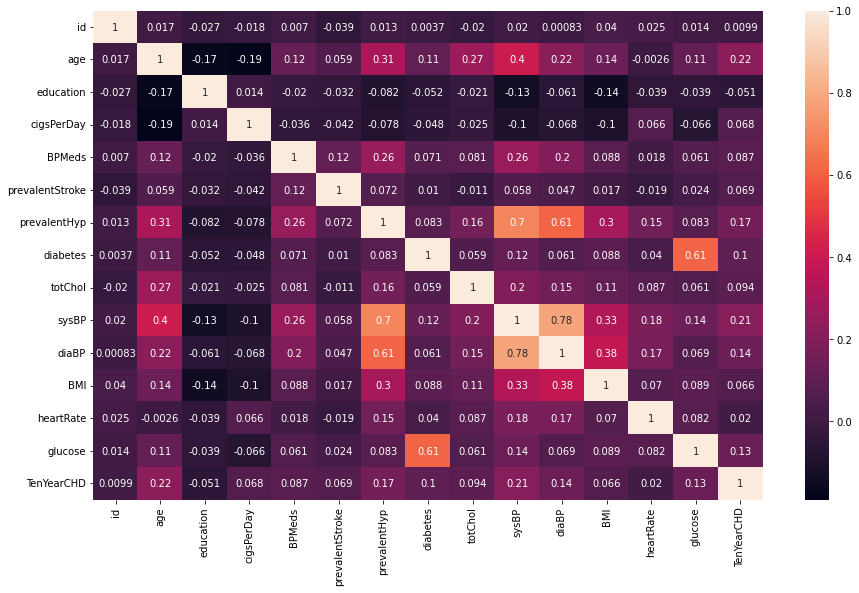

In [52]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True)

We can see from the heatmap that following features are related to each other-


> 1)glucose and diabetes(corr coef-0.61)

> 2)sys and diaBP(corr coef-0.78)

> 3)prevelant hyp and sysBP(corr coef-0.7)







In [53]:
continous_features

['age',
 'cigsPerDay',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

In [54]:
nominal_features

['education',
 'sex',
 'is_smoking',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'TenYearCHD']

we can use 'pulse rate' to replace sysBP and diaBP using relation-
pulse rate=sysBP-diaBP

In [55]:
df['pulse']=df['sysBP']-df['diaBP']


In [56]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD', 'pulse'],
      dtype='object')

Dropping features to remove multicollinearity-

In [57]:
df.drop(columns=['diaBP','sysBP','diabetes','prevalentHyp'],axis=1,inplace=True)

In [58]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'totChol', 'BMI', 'heartRate', 'glucose',
       'TenYearCHD', 'pulse'],
      dtype='object')

**Encoding categorical data**
Using label based encoding for sex and is_smoking.


In [59]:
df['sex']=df['sex'].apply(lambda x:1 if x=='M' else 1)
df['is_smoking']=df['is_smoking'].apply(lambda x:1 if x=='YES' else 0)

is_smoking and cigs per day are also correlated to each other.So dropping is_smoking column.

In [60]:
df.drop(columns=['is_smoking'],axis=1,inplace=True)

we can see from the below heatmap that multicollinearity has been removed succesfully by dropping some columns.

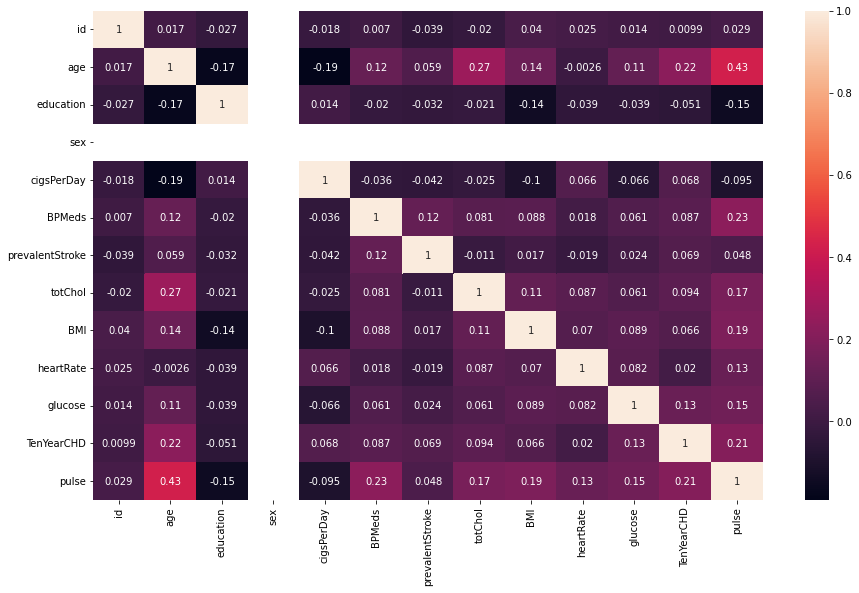

In [61]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True)

In [62]:
df_new=df[['age', 'education', 'sex', 'cigsPerDay', 'BPMeds','prevalentStroke', 'totChol','BMI', 'heartRate', 'glucose','TenYearCHD','pulse']]

Seperating our Data in dependent and independent features.

> Our dependent variable is weather in Ten years person will develop Chronic heart disease or not.

> 0 means no chronic disease will develop and 1 means disease will develop disease.

> It depends on 11 other independent features.





In [63]:
X=df_new[['age', 'education', 'sex','cigsPerDay', 'BPMeds','prevalentStroke', 'totChol','BMI', 'heartRate', 'glucose','pulse']]
Y=df_new['TenYearCHD']

Our dependent feature has very high data imbalance with 0 having around 2700 observations and 1 having around 600 observations.We will balance this imbalance using SMOTE technique.

**SMOTE stands for Synthetic Minority Oversampling Technique**

In [64]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X.iloc[:,:], Y)

print('Original dataset shape', len(Y))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 3390
Resampled dataset shape 5758


In [65]:
y_smote.value_counts().tolist()

[2879, 2879]

We can see the through barplot data imbalance before balancing and balanced data after using SMOTE. 

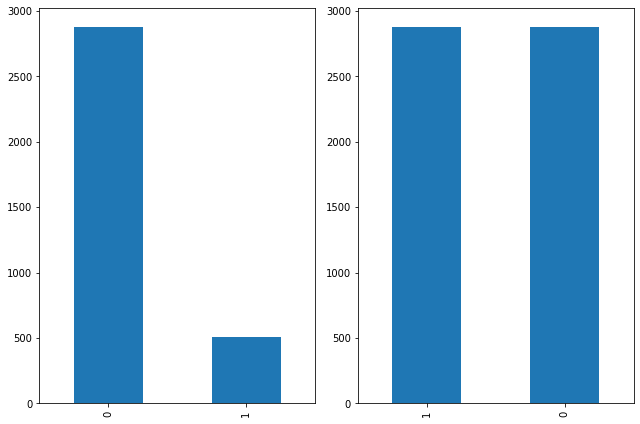

In [66]:
plt.figure(figsize=(9,6))
plt.subplot(1,2,1)
Y.value_counts().plot(kind='bar')
plt.subplot(1,2,2)
y_smote.value_counts().plot(kind='bar')
plt.tight_layout()




([<matplotlib.patches.Wedge at 0x7fe449972190>,
 [Text(-1.1, 1.3471114790620887e-16, '1'),
  Text(1.1500000000000001, -2.816687638038913e-16, '0')],
 [Text(-0.6, 7.347880794884119e-17, '50.0%'),
  Text(0.65, -1.592040838891559e-16, '50.0%')])

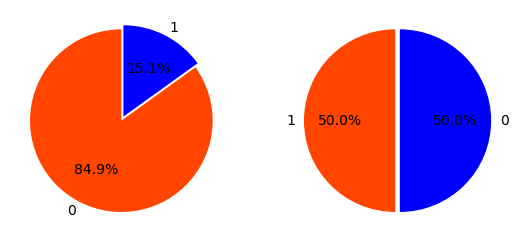

In [67]:
plt.figure(figsize=(9,9))
plt.subplot(1,2,1)
labels = Y.value_counts().index.tolist()
sizes = Y.value_counts().tolist()
explode = (0, 0.05)
colors = ['orangered', 'blue']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle =90, textprops={'fontsize': 14})

plt.subplot(1,2,2)

labels = y_smote.value_counts().index.tolist()
sizes = y_smote.value_counts().tolist()
explode = (0, 0.05)
colors = ['orangered', 'blue']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle =90, textprops={'fontsize': 14})


In [68]:
x_smote.head()

age  education  sex  cigsPerDay  BPMeds  prevalentStroke  totChol    BMI  \
0   64        2.0    1         3.0     0.0                0    221.0  25.38   
1   36        4.0    1         0.0     0.0                0    212.0  29.77   
2   46        1.0    1        10.0     0.0                0    250.0  20.35   
3   50        1.0    1        20.0     0.0                0    233.0  28.26   
4   64        1.0    1        30.0     0.0                0    241.0  26.42   

   heartRate  glucose  pulse  
0       90.0     80.0   63.0  
1       72.0     75.0   70.0  
2       88.0     94.0   45.0  
3       68.0     94.0   70.0  
4       70.0     77.0   51.5

In [69]:
x_smote.columns

Index(['age', 'education', 'sex', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'totChol', 'BMI', 'heartRate', 'glucose', 'pulse'],
      dtype='object')

Splitting our data into train and test sets .75% for training the model and 25% for testing the model.

In [81]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( x_smote,y_smote , test_size = 0.25, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(4318, 11)
(1440, 11)


In [82]:
y_test.value_counts()

1    745
0    695
Name: TenYearCHD, dtype: int64

Using min max scaler scale our data.

In [83]:
scaler = MinMaxScaler()
X_train[['cigsPerDay','age','totChol', 'BMI', 'heartRate', 'glucose','pulse']] = scaler.fit_transform(X_train[['cigsPerDay','age','totChol', 'BMI', 'heartRate', 'glucose', 'pulse']])
X_test[['cigsPerDay','age','totChol','BMI', 'heartRate', 'glucose', 'pulse']] = scaler.transform(X_test[['cigsPerDay','age','totChol', 'BMI', 'heartRate', 'glucose','pulse']])

In [84]:
X_train.head(5)

age  education  sex  cigsPerDay  BPMeds  prevalentStroke   totChol  \
5547  0.631579   1.844172    1    0.225416     0.0                0  0.196723   
5252  0.710526   1.026098    1    0.000000     0.0                0  0.235727   
2761  0.315789   1.000000    1    0.214286     0.0                0  0.212224   
1590  0.526316   2.000000    1    0.000000     0.0                0  0.183362   
628   0.763158   1.000000    1    0.000000     0.0                0  0.249576   

           BMI  heartRate   glucose     pulse  
5547  0.276230   0.323991  0.126751  0.211199  
5252  0.102407   0.474234  0.127561  0.469031  
2761  0.279628   0.315789  0.107345  0.164265  
1590  0.210578   0.136842  0.237288  0.597327  
628   0.383692   0.368421  0.141243  0.455462

**1) Logistic Regression**

In [277]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(class_weight='balanced',fit_intercept=True, max_iter=10000)
clf.fit(X_train, y_train)
THRESOLD=0.3
preds=np.where(clf.predict_proba(X_test)[:,1]>THRESOLD,1,0)
pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                   precision_score(y_test, preds), roc_auc_score(y_test, preds),2*precision_score(y_test, preds)*recall_score(y_test, preds)/(precision_score(y_test, preds)+recall_score(y_test, preds))], 
             index=["accuracy", "recall", "precision", "roc_auc_score",'f1 score'])

0
accuracy       0.612500
recall         0.948993
precision      0.576202
roc_auc_score  0.600396
f1 score       0.717039

We can see from the evaluation metrics that performance of this model is not that good although we are getting good recall value which is good in case of medical related classification.

In [278]:
clf.coef_

array([[ 2.43997785, -0.05630894,  0.00344755,  2.19894558,  0.48081008,
        -0.53426809,  1.42091114,  0.8067062 , -0.33327124,  2.4550702 ,
         2.43426583]])

In [279]:
clf.intercept_

array([-2.84165144])

In [280]:
np.unique(preds,return_counts=True)


(array([0, 1]), array([ 213, 1227]))

In [281]:
np.unique(y_test,return_counts=True)

(array([0, 1]), array([695, 745]))

In [282]:
cm = confusion_matrix(y_test,preds)
print(cm)

[[175 520]
 [ 38 707]]


Lets draw Confusion matrix.

[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

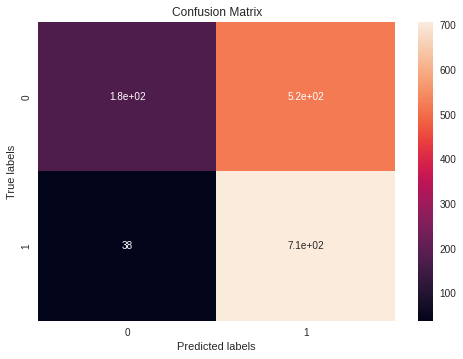

In [283]:
# Get the confusion matrix for both train and test

labels = ['0', '1']

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

Lets see area under curve(AUC) for Recievers operator curve(ROC).
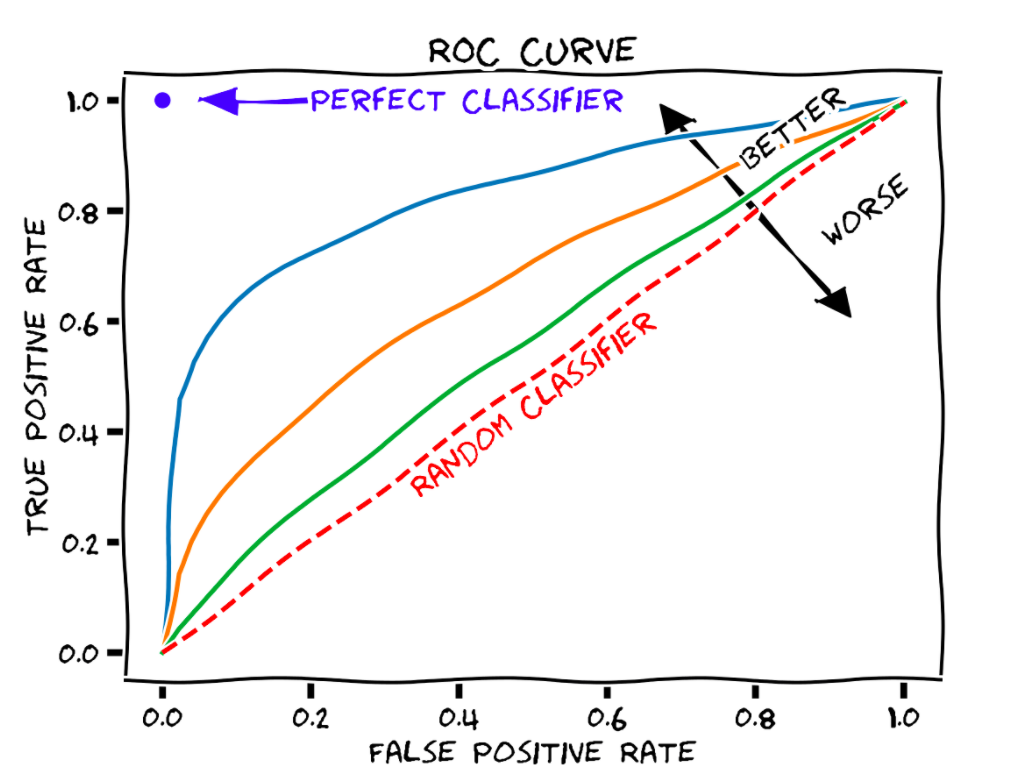

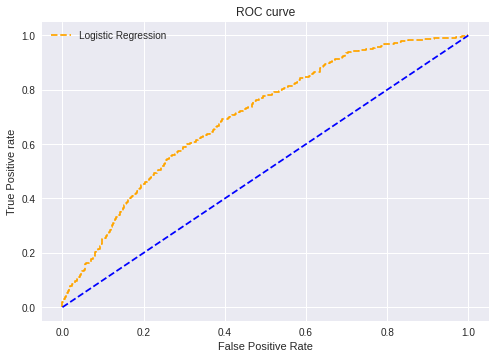

In [284]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr, tpr, thresh = roc_curve(y_test, clf.predict_proba(X_test)[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()


Let's try to see best thresold value for better classification.

Best Threshold=0.491524, G-Mean=0.667


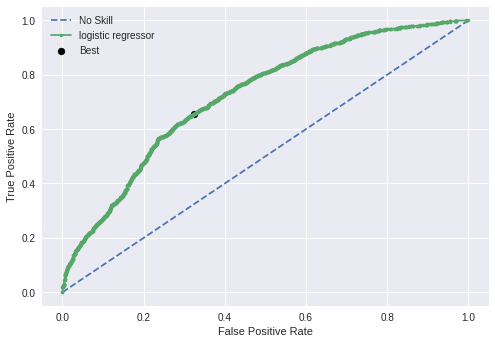

In [285]:
## Calculate optimal threshold using roc_curve method
fpr, tpr, thresholds = roc_curve(y_train,clf.predict_proba(X_train)[:,1] )
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# Locate the index of the largest geometric mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (1-thresholds[ix], gmeans[ix]))


# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='logistic regressor' , marker='.')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

**2)K-nearest Neighbours classifier-**

In [288]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2,weights='distance')
classifier.fit(X_train, y_train)
THRESOLD=0.33
preds=np.where(classifier.predict_proba(X_test)[:,1]>THRESOLD,1,0)
pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                   precision_score(y_test, preds), roc_auc_score(y_test, preds),2*precision_score(y_test, preds)*recall_score(y_test, preds)/(precision_score(y_test, preds)+recall_score(y_test, preds))], 
             index=["accuracy", "recall", "precision", "roc_auc_score",'f1 score'])

0
accuracy       0.818056
recall         0.916779
precision      0.773499
roc_auc_score  0.814504
f1 score       0.839066

From evaluation metrics,we can see performance improved significantly w.r.t logistic regression.Recall is the most important parameter for medical related classifications which is also high.

We are also getting good area under ROC curve.

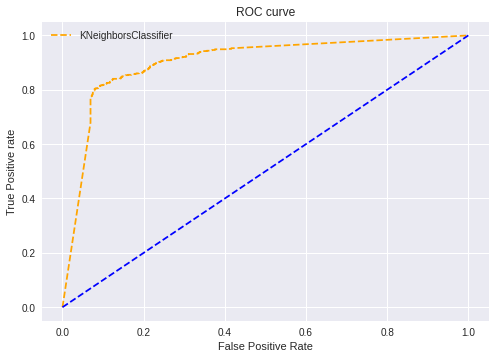

In [289]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr, tpr, thresh = roc_curve(y_test, classifier.predict_proba(X_test)[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='KNeighborsClassifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

Best Threshold=0.292049, G-Mean=0.860


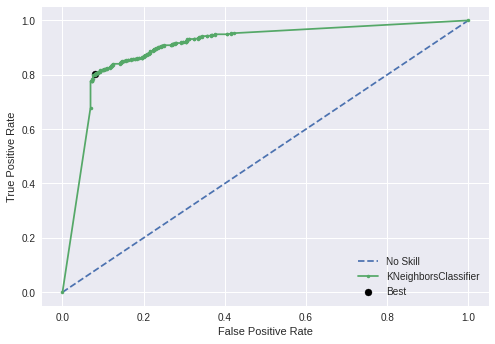

In [291]:
## Calculate optimal threshold using roc_curve method
fpr, tpr, thresholds = roc_curve(y_test,classifier.predict_proba(X_test)[:,1] )
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# Locate the index of the largest geometric mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (1-thresholds[ix], gmeans[ix]))


# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='KNeighborsClassifier' , marker='.')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [133]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2,weights='uniform')
classifier.fit(X_train, y_train)
THRESOLD=0.3
preds=np.where(classifier.predict_proba(X_test)[:,1]>THRESOLD,1,0)
pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                   precision_score(y_test, preds), roc_auc_score(y_test, preds)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

0
accuracy       0.786111
recall         0.970470
precision      0.716551
roc_auc_score  0.779480

In [134]:
cm = confusion_matrix(y_test,preds)
print(cm)

[[409 286]
 [ 22 723]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

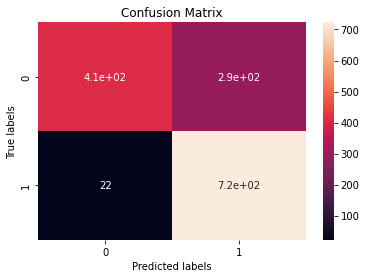

In [135]:
# Get the confusion matrix for both train and test

labels = ['0', '1']

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**3)K nearest neighbour classifier with grid search cross validation-**

In [292]:
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = [3,5,7,9]
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


In [293]:
grid.best_params_

{'n_neighbors': 3}

In [294]:
grid.best_estimator_

KNeighborsClassifier(n_neighbors=3)

In [299]:
THRESOLD=0.33
preds=np.where(classifier.predict_proba(X_test)[:,1]>THRESOLD,1,0)
pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                   precision_score(y_test, preds), roc_auc_score(y_test, preds),2*precision_score(y_test, preds)*recall_score(y_test, preds)/(precision_score(y_test, preds)+recall_score(y_test, preds))], 
             index=["accuracy", "recall", "precision", "roc_auc_score",'f1 score'])

0
accuracy       0.818056
recall         0.916779
precision      0.773499
roc_auc_score  0.814504
f1 score       0.839066

In [300]:
cm = confusion_matrix(y_test,preds)
print(cm)

[[495 200]
 [ 62 683]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

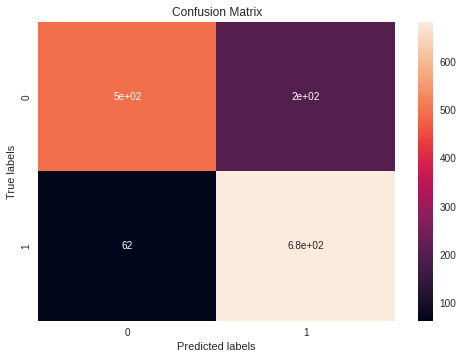

In [301]:
# Get the confusion matrix for both train and test

labels = ['0', '1']

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

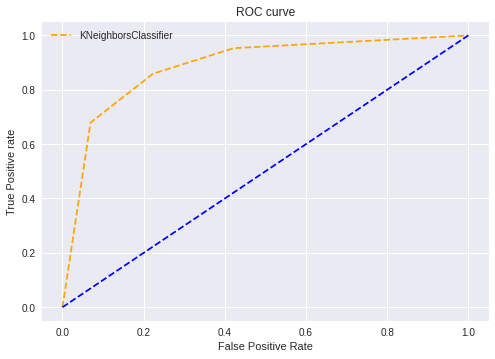

In [302]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr, tpr, thresh = roc_curve(y_test, grid.predict_proba(X_test)[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='KNeighborsClassifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

Best Threshold=0.333333, G-Mean=0.817


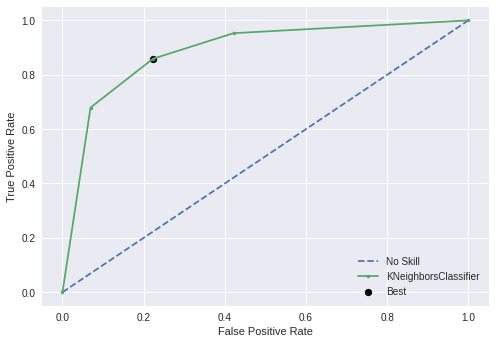

In [303]:
## Calculate optimal threshold using roc_curve method
fpr, tpr, thresholds = roc_curve(y_test,grid.predict_proba(X_test)[:,1] )
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# Locate the index of the largest geometric mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (1-thresholds[ix], gmeans[ix]))


# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='KNeighborsClassifier' , marker='.')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

**4)Logistic regression with cross validation**

In [129]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_validate

In [130]:
logistic = LogisticRegression()

In [131]:
scoring = ['accuracy']
scores = cross_validate(logistic,X_train, y_train, scoring = scoring, cv = 5, return_train_score=True,return_estimator=True,verbose = 10)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s


[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.661, test=0.654) total time=   0.1s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.665, test=0.648) total time=   0.0s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.662, test=0.660) total time=   0.1s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.655, test=0.683) total time=   0.1s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.660, test=0.660) total time=   0.0s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished


In [132]:
scores['train_accuracy']

array([0.66097279, 0.66502606, 0.66155182, 0.65470333, 0.65991317])

In [133]:
scores['test_accuracy']

array([0.65393519, 0.64814815, 0.65972222, 0.6825029 , 0.66048667])

**5)Support vector classifier with linear kernel-**

In [305]:
clf = svm.SVC(kernel='linear', C=10000,probability=True)
clf.fit(X_train,y_train)

SVC(C=10000, kernel='linear', probability=True)

In [307]:
THRESOLD=0.3
preds=np.where(clf.predict_proba(X_test)[:,1]>THRESOLD,1,0)
pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                   precision_score(y_test, preds), roc_auc_score(y_test, preds),2*precision_score(y_test, preds)*recall_score(y_test, preds)/(precision_score(y_test, preds)+recall_score(y_test, preds))], 
             index=["accuracy", "recall", "precision", "roc_auc_score",'f1 score'])

0
accuracy       0.615972
recall         0.940940
precision      0.579339
roc_auc_score  0.604283
f1 score       0.717136

In [308]:
cm = confusion_matrix(y_test,preds)
print(cm)

[[186 509]
 [ 44 701]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

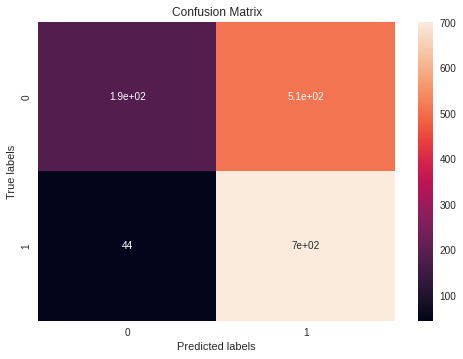

In [309]:
# Get the confusion matrix for both train and test

labels = ['0', '1']

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

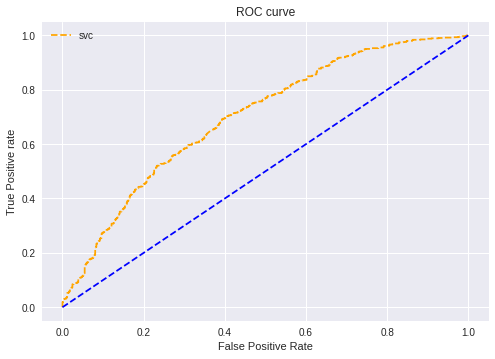

In [310]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr, tpr, thresh = roc_curve(y_test, clf.predict_proba(X_test)[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='svc')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

Best Threshold=0.526719, G-Mean=0.648


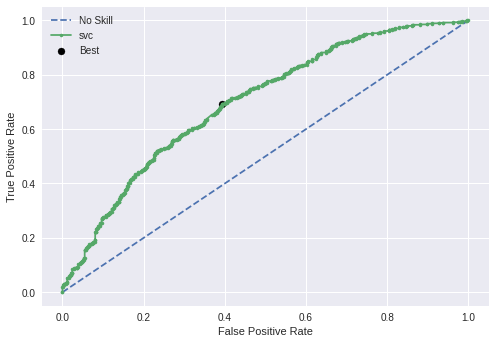

In [311]:
## Calculate optimal threshold using roc_curve method
fpr, tpr, thresholds = roc_curve(y_test,clf.predict_proba(X_test)[:,1] )
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# Locate the index of the largest geometric mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (1-thresholds[ix], gmeans[ix]))


# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='svc' , marker='.')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

**6)Support vector classifier with grid search cross validation**

In [312]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf']}
clf=svm.SVC(probability=True)
grid = GridSearchCV(clf, param_grid, refit = True, verbose = 3)
grid.fit(X_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.686 total time=   3.6s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.678 total time=   3.6s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.690 total time=   3.6s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   3.6s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.677 total time=   3.6s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.648 total time=   5.2s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.652 total time=   4.2s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.661 total time=   4.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.647 total time=   4.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.663 total time=   4.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.579 total time=   4.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
             verbose=3)

In [313]:
grid.best_estimator_

SVC(C=1000, gamma=1, probability=True)

In [314]:
grid.best_params_

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}

In [315]:
THRESOLD=0.35
preds=np.where(grid.predict_proba(X_test)[:,1]>THRESOLD,1,0)
pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                   precision_score(y_test, preds), roc_auc_score(y_test, preds),2*precision_score(y_test, preds)*recall_score(y_test, preds)/(precision_score(y_test, preds)+recall_score(y_test, preds))], 
             index=["accuracy", "recall", "precision", "roc_auc_score",'f1 score'])

0
accuracy       0.795833
recall         0.824161
precision      0.790219
roc_auc_score  0.794814
f1 score       0.806833

We can see from evaluation metrics there is a significant improvement over svc with linear kernel without cross validation.

In [316]:
cm = confusion_matrix(y_test,preds)
print(cm)

[[532 163]
 [131 614]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

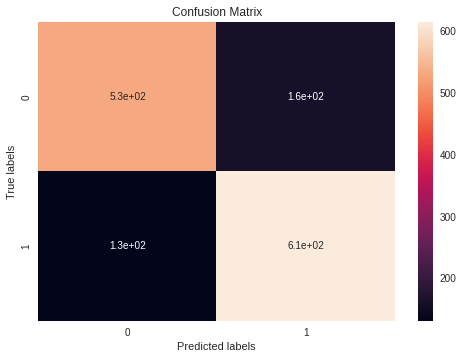

In [317]:
# Get the confusion matrix for both train and test

labels = ['0', '1']

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

Best Threshold=0.576855, G-Mean=0.807


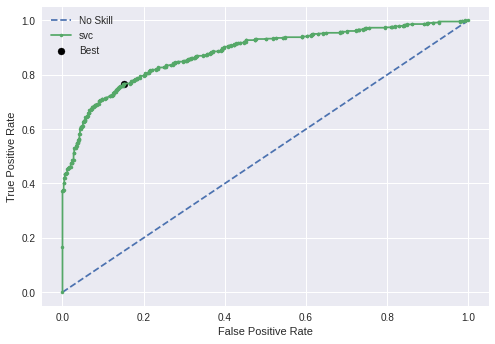

In [318]:
## Calculate optimal threshold using roc_curve method
fpr, tpr, thresholds = roc_curve(y_test,grid.predict_proba(X_test)[:,1] )
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# Locate the index of the largest geometric mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (1-thresholds[ix], gmeans[ix]))


# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='svc' , marker='.')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

**7)Decision Tree Classifier**

In [319]:
# Define and fit the model
dt_classifier = DecisionTreeClassifier(criterion = 'gini',max_depth=1000, random_state = 0)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1000, random_state=0)

In [320]:
THRESOLD=0.5
preds=np.where(dt_classifier.predict_proba(X_test)[:,1]>THRESOLD,1,0)
pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                   precision_score(y_test, preds), roc_auc_score(y_test, preds),2*precision_score(y_test, preds)*recall_score(y_test, preds)/(precision_score(y_test, preds)+recall_score(y_test, preds))], 
             index=["accuracy", "recall", "precision", "roc_auc_score",'f1 score'])

0
accuracy       0.790278
recall         0.813423
precision      0.788036
roc_auc_score  0.789445
f1 score       0.800528

8)**Decision Tree classifier with grid search cv**

In [321]:
# Define parameters for tuning
dt = DecisionTreeClassifier(random_state=42)
params = {'max_depth': [2, 3, 50, 100, 500],'min_samples_leaf': [10, 20, 50, 100],'criterion': ["gini", "entropy"]}
# Define Grid Search
grid_dt = GridSearchCV(estimator=dt, param_grid=params, cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

# Fit grid search on train data
grid_dt.fit(X_train, y_train)

Fitting 4 folds for each of 40 candidates, totalling 160 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 50, 100, 500],
                         'min_samples_leaf': [10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [325]:
THRESOLD=0.35
preds=np.where(grid_dt.predict_proba(X_test)[:,1]>THRESOLD,1,0)
pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                   precision_score(y_test, preds), roc_auc_score(y_test, preds),2*precision_score(y_test, preds)*recall_score(y_test, preds)/(precision_score(y_test, preds)+recall_score(y_test, preds))], 
             index=["accuracy", "recall", "precision", "roc_auc_score",'f1 score'])

0
accuracy       0.745139
recall         0.832215
precision      0.719258
roc_auc_score  0.742007
f1 score       0.771624

In [326]:
grid_dt.best_estimator_

DecisionTreeClassifier(max_depth=50, min_samples_leaf=10, random_state=42)

In [327]:
grid_dt.best_params_

{'criterion': 'gini', 'max_depth': 50, 'min_samples_leaf': 10}

In [328]:
# Display the grid search results
score_df = pd.DataFrame(grid_dt.cv_results_)
#score_df.head()
score_df.nlargest(5,"mean_test_score")

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
8        0.030658      0.003497         0.003828        0.000931   
12       0.027616      0.001220         0.003162        0.000118   
16       0.027503      0.000679         0.003321        0.000141   
28       0.043617      0.001661         0.003164        0.000090   
32       0.045716      0.003919         0.003452        0.000169   

   param_criterion param_max_depth param_min_samples_leaf  \
8             gini              50                     10   
12            gini             100                     10   
16            gini             500                     10   
28         entropy              50                     10   
32         entropy             100                     10   

                                               params  split0_test_score  \
8   {'criterion': 'gini', 'max_depth': 50, 'min_sa...           0.737037   
12  {'criterion': 'gini', 'max_depth': 100, 'min_s...           0.737037   
16  {'criterion': 'gini', 'max_depth': 500, 'min_s...           0.737037   
28  {'criterion': 'entropy', 'max_depth': 50, 'min...           0.722222   
32  {'criterion': 'entropy', 'max_depth': 100, 'mi...           0.722222   

    split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
8            0.739815           0.781279           0.737720         0.748963   
12           0.739815           0.781279           0.737720         0.748963   
16           0.739815           0.781279           0.737720         0.748963   
28           0.765741           0.752549           0.749768         0.747570   
32           0.765741           0.752549           0.749768         0.747570   

    std_test_score  rank_test_score  
8         0.018686                1  
12        0.018686                1  
16        0.018686                1  
28        0.015830                4  
32        0.015830                4

In [329]:
cm = confusion_matrix(y_test,preds)
print(cm)

[[453 242]
 [125 620]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

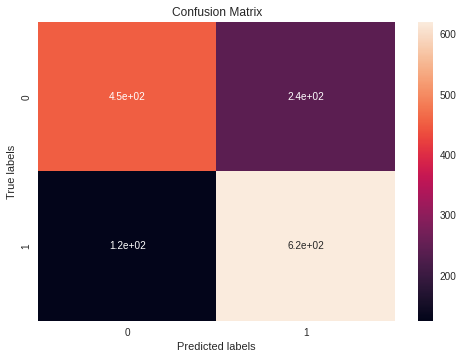

In [330]:
# Get the confusion matrix for both train and test

labels = ['0', '1']

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

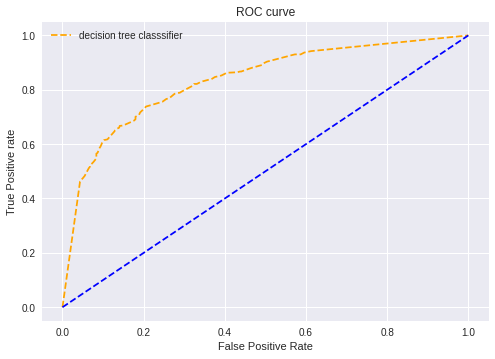

In [331]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr, tpr, thresh = roc_curve(y_test,grid_dt.predict_proba(X_test)[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='decision tree classsifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

Best Threshold=0.473684, G-Mean=0.766


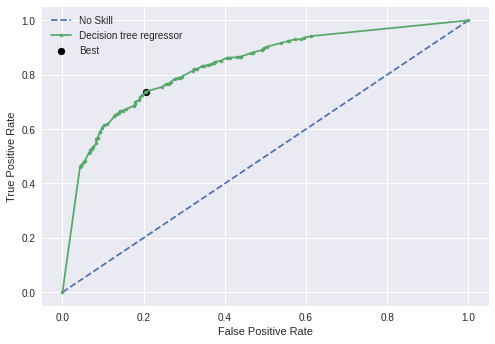

In [332]:
## Calculate optimal threshold using roc_curve method
fpr, tpr, thresholds = roc_curve(y_test,grid_dt.predict_proba(X_test)[:,1] )
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# Locate the index of the largest geometric mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (1-thresholds[ix], gmeans[ix]))


# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='Decision tree regressor' , marker='.')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

**9)Random Forest Classifier**

In [125]:
## Define Random Forest model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [132]:
THRESOLD=0.35
preds=np.where(rf.predict_proba(X_test)[:,1]>THRESOLD,1,0)
pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                   precision_score(y_test, preds), roc_auc_score(y_test, preds),2*precision_score(y_test, preds)*recall_score(y_test, preds)/(precision_score(y_test, preds)+recall_score(y_test, preds))], 
             index=["accuracy", "recall", "precision", "roc_auc_score",'f1 score'])

0
accuracy       0.838889
recall         0.939597
precision      0.789177
roc_auc_score  0.835266
f1 score       0.857843

We can see through evaluation metrics that there is a significant improvement over decision tree classifier.

**10)Random forest classifier with grid search cross validation-**

In [135]:
# Hypertuning using grid search cv
grid_params = { 'n_estimators': [100, 300],
              'max_depth': [8, 15, 50],
              'min_samples_split': [2,3,4],
              'min_samples_leaf': [2, 10], 
              'criterion':['gini', 'entropy']}
grid_rf = GridSearchCV(RandomForestClassifier(), grid_params, cv= 5)
# fit the model on our train set
grid_rf.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [8, 15, 50], 'min_samples_leaf': [2, 10],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 300]})

In [136]:
THRESOLD=0.35
preds=np.where(grid_rf.predict_proba(X_test)[:,1]>THRESOLD,1,0)
pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                   precision_score(y_test, preds), roc_auc_score(y_test, preds),2*precision_score(y_test, preds)*recall_score(y_test, preds)/(precision_score(y_test, preds)+recall_score(y_test, preds))], 
             index=["accuracy", "recall", "precision", "roc_auc_score",'f1 score'])

0
accuracy       0.834028
recall         0.939597
precision      0.782998
roc_auc_score  0.830230
f1 score       0.854179

In [142]:
grid_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 50,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 300}

In [143]:
grid_rf.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=50, min_samples_leaf=2,
                       min_samples_split=3, n_estimators=300)

In [137]:
cm = confusion_matrix(y_test,preds)
print(cm)

[[501 194]
 [ 45 700]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

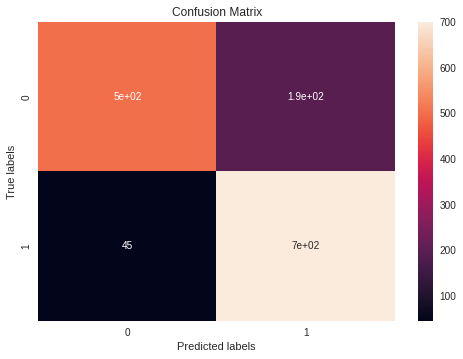

In [138]:
# Get the confusion matrix for both train and test

labels = ['0', '1']

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

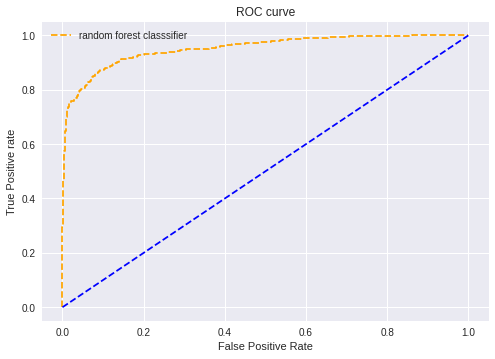

In [139]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr, tpr, thresh = roc_curve(y_test,grid_rf.predict_proba(X_test)[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='random forest classsifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

Best Threshold=0.479875, G-Mean=0.890


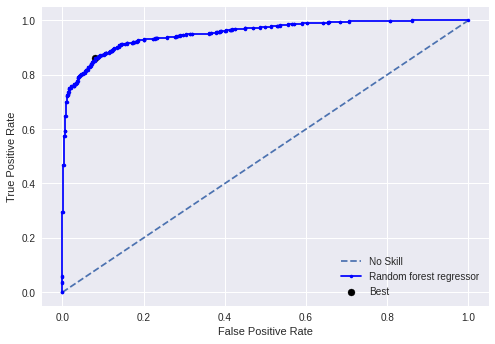

In [141]:
## Calculate optimal threshold using roc_curve method
fpr, tpr, thresholds = roc_curve(y_test,grid_rf.predict_proba(X_test)[:,1] )
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# Locate the index of the largest geometric mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (1-thresholds[ix], gmeans[ix]))


# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='Random forest regressor',color='blue' , marker='.')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

**11) Bagging classifier**

In [146]:
ensemble_bagg = BaggingClassifier(random_state=0)
ensemble_bagg.fit(X_train,y_train)


BaggingClassifier(random_state=0)

In [149]:
THRESOLD=0.5
preds=np.where(ensemble_bagg.predict_proba(X_test)[:,1]>THRESOLD,1,0)
pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                   precision_score(y_test, preds), roc_auc_score(y_test, preds),2*precision_score(y_test, preds)*recall_score(y_test, preds)/(precision_score(y_test, preds)+recall_score(y_test, preds))], 
             index=["accuracy", "recall", "precision", "roc_auc_score",'f1 score'])

0
accuracy       0.853472
recall         0.821477
precision      0.886957
roc_auc_score  0.854623
f1 score       0.852962

In [150]:
THRESOLD=0.35
preds=np.where(ensemble_bagg.predict_proba(X_test)[:,1]>THRESOLD,1,0)
pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                   precision_score(y_test, preds), roc_auc_score(y_test, preds),2*precision_score(y_test, preds)*recall_score(y_test, preds)/(precision_score(y_test, preds)+recall_score(y_test, preds))], 
             index=["accuracy", "recall", "precision", "roc_auc_score",'f1 score'])

0
accuracy       0.818056
recall         0.922148
precision      0.771044
roc_auc_score  0.814311
f1 score       0.839853

**12)Bagging classifier with grid search cv**

In [151]:
# define grid search
grid = {'n_estimators':[50, 100,500, 1000]}
grid_ensemble = GridSearchCV(BaggingClassifier(random_state=0),param_grid=grid, n_jobs=-1, cv=5, scoring='roc_auc',error_score=0)
grid_ensemble.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=0, estimator=BaggingClassifier(random_state=0),
             n_jobs=-1, param_grid={'n_estimators': [50, 100, 500, 1000]},
             scoring='roc_auc')

In [155]:
THRESOLD=0.35
preds=np.where(grid_ensemble.predict_proba(X_test)[:,1]>THRESOLD,1,0)
pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                   precision_score(y_test, preds), roc_auc_score(y_test, preds),2*precision_score(y_test, preds)*recall_score(y_test, preds)/(precision_score(y_test, preds)+recall_score(y_test, preds))], 
             index=["accuracy", "recall", "precision", "roc_auc_score",'f1 score'])

0
accuracy       0.833333
recall         0.935570
precision      0.784027
roc_auc_score  0.829656
f1 score       0.853121

In [156]:
cm = confusion_matrix(y_test,preds)
print(cm)

[[503 192]
 [ 48 697]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

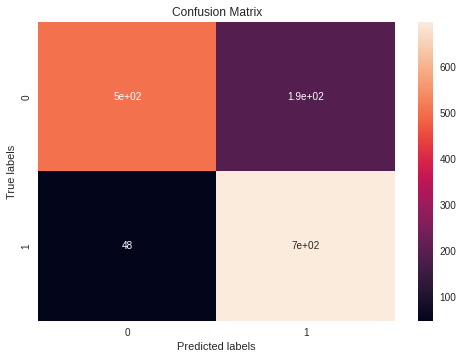

In [157]:
# Get the confusion matrix for both train and test

labels = ['0', '1']

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [159]:
# Display the grid search results
score_df = pd.DataFrame(grid_ensemble.cv_results_)
#score_df.head()
score_df.nlargest(5,"mean_test_score")

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
3      21.769256      1.014118         0.385748        0.041432   
2      11.187249      0.064154         0.210107        0.004329   
1       2.252363      0.016278         0.045759        0.000667   
0       1.125357      0.007839         0.026412        0.001128   

  param_n_estimators                  params  split0_test_score  \
3               1000  {'n_estimators': 1000}           0.949627   
2                500   {'n_estimators': 500}           0.948191   
1                100   {'n_estimators': 100}           0.946498   
0                 50    {'n_estimators': 50}           0.941932   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
3           0.935045           0.942915           0.953873           0.949885   
2           0.934097           0.942009           0.953159           0.950248   
1           0.930144           0.937752           0.953065           0.945800   
0           0.928030           0.936066           0.951368           0.940385   

   mean_test_score  std_test_score  rank_test_score  
3         0.946269        0.006624                1  
2         0.945541        0.006792                2  
1         0.942652        0.007919                3  
0         0.939556        0.007627                4

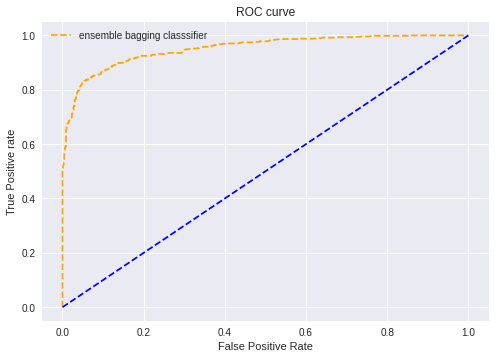

In [158]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr, tpr, thresh = roc_curve(y_test,grid_ensemble.predict_proba(X_test)[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='ensemble bagging classsifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

**13)Adaboost classifier**

In [161]:
ad_clf=AdaBoostClassifier(random_state=0)
ad_clf.fit(X_train,y_train)

AdaBoostClassifier(random_state=0)

In [165]:
THRESOLD=0.5
preds=np.where(ad_clf.predict_proba(X_test)[:,1]>THRESOLD,1,0)
pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                   precision_score(y_test, preds), roc_auc_score(y_test, preds),2*precision_score(y_test, preds)*recall_score(y_test, preds)/(precision_score(y_test, preds)+recall_score(y_test, preds))], 
             index=["accuracy", "recall", "precision", "roc_auc_score",'f1 score'])

0
accuracy       0.781944
recall         0.728859
precision      0.829008
roc_auc_score  0.783854
f1 score       0.775714

**14)Adaboost classifier with grid search cv**

In [166]:
abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

parameters = {'base_estimator__max_depth':[i for i in range(2,11,2)],
              'base_estimator__min_samples_leaf':[5,10],
              'n_estimators':[10,50,250,1000],
              'learning_rate':[0.01,0.1]}

clf = GridSearchCV(abc, parameters,verbose=3,scoring='f1',n_jobs=-1)
clf.fit(X_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
             n_jobs=-1,
             param_grid={'base_estimator__max_depth': [2, 4, 6, 8, 10],
                         'base_estimator__min_samples_leaf': [5, 10],
                         'learning_rate': [0.01, 0.1],
                         'n_estimators': [10, 50, 250, 1000]},
             scoring='f1', verbose=3)

In [171]:
THRESOLD=0.35
preds=np.where(clf.predict_proba(X_test)[:,1]>THRESOLD,1,0)
pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                   precision_score(y_test, preds), roc_auc_score(y_test, preds),2*precision_score(y_test, preds)*recall_score(y_test, preds)/(precision_score(y_test, preds)+recall_score(y_test, preds))], 
             index=["accuracy", "recall", "precision", "roc_auc_score",'f1 score'])

0
accuracy       0.884722
recall         0.948993
precision      0.846707
roc_auc_score  0.882410
f1 score       0.894937

In [172]:
cm = confusion_matrix(y_test,preds)
print(cm)

[[567 128]
 [ 38 707]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

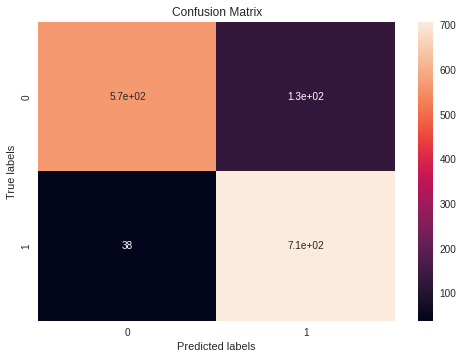

In [173]:
# Get the confusion matrix for both train and test

labels = ['0', '1']

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

Best Threshold=0.445120, G-Mean=0.912


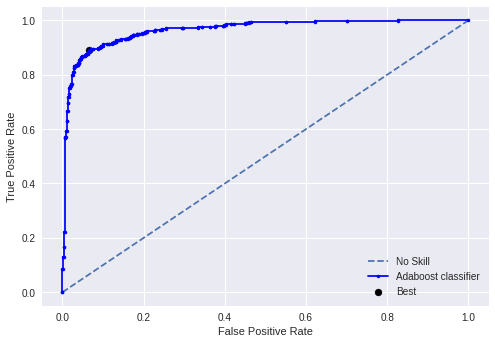

In [175]:
## Calculate optimal threshold using roc_curve method
fpr, tpr, thresholds = roc_curve(y_test,clf.predict_proba(X_test)[:,1] )
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# Locate the index of the largest geometric mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (1-thresholds[ix], gmeans[ix]))


# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='Adaboost classifier',color='blue' , marker='.')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [176]:
pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 275 kB 12.9 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=a42488b2a422ce0cdd55ffc4961cba6676b4c511dfff0352a2c70b0f9e51b71a
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [180]:
X_train.columns.tolist()

['age',
 'education',
 'sex',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'totChol',
 'BMI',
 'heartRate',
 'glucose',
 'pulse']

**Model interpretation using lime-**

In [177]:
import lime

In [178]:
from lime import lime_tabular


In [181]:
explainer = lime_tabular.LimeTabularExplainer(X_train.values, mode="classification",feature_names=X_train.columns.tolist(),
                                             )

explainer

In [188]:
y_test.iloc[5]

0

In [190]:
X_test.iloc[5]

age                0.236842
education          2.000000
sex                1.000000
cigsPerDay         0.000000
BPMeds             0.000000
prevalentStroke    0.000000
totChol            0.276740
BMI                0.419931
heartRate          0.315789
glucose            0.098870
pulse              0.306130
Name: 1573, dtype: float64

In [194]:
y_test.iloc[5]

0

In [198]:
idx = np.random.randint(1, len(X_test))

explanation = explainer.explain_instance(X_test.iloc[5], ad_clf.predict_proba, top_labels=3)

explanation.show_in_notebook()

**15)Adaboost model using support vector classifier**

In [225]:
# Adaboost with SVC as estimator
adb_svc = AdaBoostClassifier(random_state=1,base_estimator=svm.SVC(kernel='rbf', C=10000,random_state=1,probability=True),learning_rate=0.1,n_estimators=20)
adb_svc.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=SVC(C=10000, probability=True,
                                      random_state=1),
                   learning_rate=0.1, n_estimators=20, random_state=1)

In [226]:
THRESOLD=0.3
pred=np.where(clf_xgb.predict_proba(X_test)[:,1]>THRESOLD,1,0)
pd.DataFrame(data=[accuracy_score(y_test, pred), recall_score(y_test, pred),
                   precision_score(y_test, pred), roc_auc_score(y_test, pred),2*precision_score(y_test, pred)*recall_score(y_test, pred)/(precision_score(y_test, pred)+recall_score(y_test, pred))], 
             index=["accuracy", "recall", "precision", "roc_auc_score",'f1 score'])

0
accuracy       0.754861
recall         0.893960
precision      0.708511
roc_auc_score  0.749858
f1 score       0.790504

**16) XGBOOST classifier**

In [208]:
# Define XGB model
clf_xgb = XGBClassifier(random_state=0)
clf_xgb.fit(X_train, y_train)

XGBClassifier()

In [214]:
THRESOLD=0.3
preds=np.where(clf_xgb.predict_proba(X_test)[:,1]>THRESOLD,1,0)
pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                   precision_score(y_test, preds), roc_auc_score(y_test, preds),2*precision_score(y_test, preds)*recall_score(y_test, preds)/(precision_score(y_test, preds)+recall_score(y_test, preds))], 
             index=["accuracy", "recall", "precision", "roc_auc_score",'f1 score'])

0
accuracy       0.754861
recall         0.893960
precision      0.708511
roc_auc_score  0.749858
f1 score       0.790504

**17)XGboost classifier with grid search cv**

In [216]:
estimator = XGBClassifier(objective= 'binary:logistic',nthread=4,seed=42)
parameters = {
    'max_depth': [10,20,100],
    'n_estimators': [10,50,100],
    'learning_rate': [0.1, 0.01, 0.001]
}

In [217]:
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)
grid_search.fit(X_train, y_train)


Fitting 10 folds for each of 27 candidates, totalling 270 fits


GridSearchCV(cv=10, estimator=XGBClassifier(nthread=4, seed=42), n_jobs=10,
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [10, 20, 100],
                         'n_estimators': [10, 50, 100]},
             scoring='roc_auc', verbose=True)

In [221]:
THRESOLD=0.35
preds=np.where(grid_search.predict_proba(X_test)[:,1]>THRESOLD,1,0)
pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                   precision_score(y_test, preds), roc_auc_score(y_test, preds),2*precision_score(y_test, preds)*recall_score(y_test, preds)/(precision_score(y_test, preds)+recall_score(y_test, preds))], 
             index=["accuracy", "recall", "precision", "roc_auc_score",'f1 score'])

0
accuracy       0.875000
recall         0.887248
precision      0.873184
roc_auc_score  0.874559
f1 score       0.880160

In [222]:
cm = confusion_matrix(y_test,preds)
print(cm)

[[599  96]
 [ 84 661]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

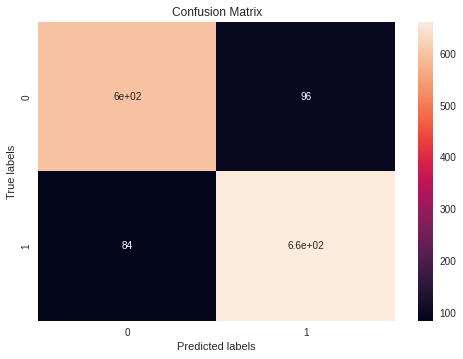

In [223]:
# Get the confusion matrix for both train and test

labels = ['0', '1']

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

Best Threshold=0.270761, G-Mean=0.894


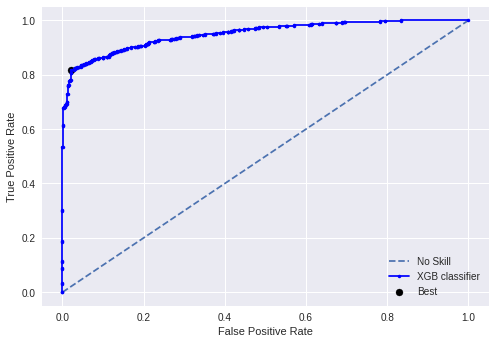

In [224]:
## Calculate optimal threshold using roc_curve method
fpr, tpr, thresholds = roc_curve(y_test,grid_search.predict_proba(X_test)[:,1] )
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# Locate the index of the largest geometric mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (1-thresholds[ix], gmeans[ix]))


# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='XGB classifier',color='blue' , marker='.')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

**18)Catboost classifer**

In [230]:
cat_class = cb.CatBoostClassifier(random_state=1,verbose=False)
cat_class.fit(X_train, y_train)

In [234]:
THRESOLD=0.4
pred=np.where(cat_class.predict_proba(X_test)[:,1]>THRESOLD,1,0)
pd.DataFrame(data=[accuracy_score(y_test, pred), recall_score(y_test, pred),
                   precision_score(y_test, pred), roc_auc_score(y_test, pred),2*precision_score(y_test, pred)*recall_score(y_test, pred)/(precision_score(y_test, pred)+recall_score(y_test, pred))], 
             index=["accuracy", "recall", "precision", "roc_auc_score",'f1 score'])

0
accuracy       0.868750
recall         0.864430
precision      0.879781
roc_auc_score  0.868905
f1 score       0.872038

**19)Catboost classifier with grid search cv**

In [247]:
parameters = {'depth': [4,25,100,50],'learning_rate' :[0.01,0.1,1], 'n_estimators': [10,50,100,500,1000]}
Grid_CBC = GridSearchCV(estimator=cat_class, param_grid = parameters, cv = 5, n_jobs=-1)
Grid_CBC.fit(X_train, y_train)
 

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7fe4362f1850>,
             n_jobs=-1,
             param_grid={'depth': [4, 25, 100, 50],
                         'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [10, 50, 100, 500, 1000]})

In [248]:
Grid_CBC.best_params_

{'depth': 4, 'learning_rate': 0.1, 'n_estimators': 1000}

In [252]:
THRESOLD=0.3
pred=np.where(Grid_CBC.predict_proba(X_test)[:,1]>THRESOLD,1,0)
pd.DataFrame(data=[accuracy_score(y_test, pred), recall_score(y_test, pred),
                   precision_score(y_test, pred), roc_auc_score(y_test, pred),2*precision_score(y_test, pred)*recall_score(y_test, pred)/(precision_score(y_test, pred)+recall_score(y_test, pred))], 
             index=["accuracy", "recall", "precision", "roc_auc_score",'f1 score'])

0
accuracy       0.847222
recall         0.883221
precision      0.831858
roc_auc_score  0.845927
f1 score       0.856771

In [253]:
cm = confusion_matrix(y_test,preds)
print(cm)

[[599  96]
 [ 84 661]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

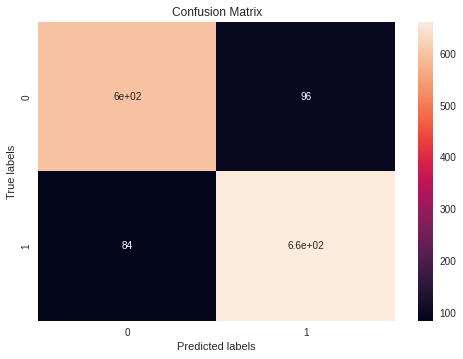

In [254]:
# Get the confusion matrix for both train and test

labels = ['0', '1']

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

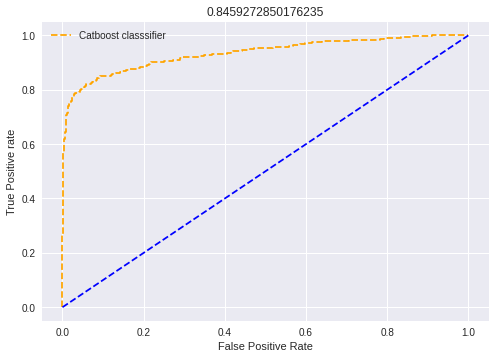

In [259]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr, tpr, thresh = roc_curve(y_test,Grid_CBC.predict_proba(X_test)[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Catboost classsifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.title(roc_auc_score(y_test, pred))
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

**20)Stacking classifier using knn, bagging and support vector and then finally with logistic regressor**

In [263]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


# define the base models
level0 = list()
level0.append(('knn', KNeighborsClassifier(n_neighbors = 5, weights = 'distance',metric = 'manhattan')))
level0.append(('Bag', DecisionTreeClassifier(random_state=1)))
level0.append(('svm', svm.SVC(kernel='rbf', C=1000,random_state=1,gamma=1)))

# define meta learner model
level1 = LogisticRegression(random_state=1)

# define the stacking model
model = StackingClassifier(estimators=level0, final_estimator=level1,cv=5)
# fit the model on all available data
model.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('knn',
                                KNeighborsClassifier(metric='manhattan',
                                                     weights='distance')),
                               ('Bag', DecisionTreeClassifier(random_state=1)),
                               ('svm', SVC(C=1000, gamma=1, random_state=1))],
                   final_estimator=LogisticRegression(random_state=1))

In [267]:
THRESOLD=0.4
pred=np.where(model.predict_proba(X_test)[:,1]>THRESOLD,1,0)
pd.DataFrame(data=[accuracy_score(y_test, pred), recall_score(y_test, pred),
                   precision_score(y_test, pred), roc_auc_score(y_test, pred),2*precision_score(y_test, pred)*recall_score(y_test, pred)/(precision_score(y_test, pred)+recall_score(y_test, pred))], 
             index=["accuracy", "recall", "precision", "roc_auc_score",'f1 score'])

0
accuracy       0.871528
recall         0.897987
precision      0.859897
roc_auc_score  0.870576
f1 score       0.878529

In [268]:
cm = confusion_matrix(y_test,preds)
print(cm)

[[599  96]
 [ 84 661]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

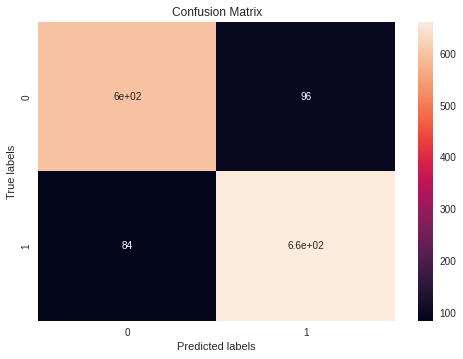

In [269]:
# Get the confusion matrix for both train and test

labels = ['0', '1']

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

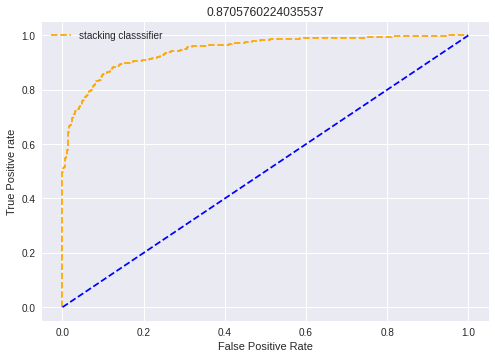

In [270]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr, tpr, thresh = roc_curve(y_test,model.predict_proba(X_test)[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='stacking classsifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.title(roc_auc_score(y_test, pred))
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

**Data interpretation using LIME-**

In [271]:
explainer = lime_tabular.LimeTabularExplainer(X_train.values, mode="classification",feature_names=X_train.columns.tolist(),
                                             )

explainer


In [272]:
idx = np.random.randint(1, len(X_test))

explanation = explainer.explain_instance(X_test.iloc[5], model.predict_proba, top_labels=3)

explanation.show_in_notebook()

In [275]:
y_test.iloc[8]

1

In [273]:
explanation = explainer.explain_instance(X_test.iloc[8], model.predict_proba, top_labels=3)

explanation.show_in_notebook()

In [10]:
metric_table=pd.DataFrame({'model':['Logistic','KNN','SVC','Decision tree','Random forest','Bagging','Adaboost','XG boost','Catboost','Stacking'],'Accuracy':[0.61,0.82,0.79,0.75,0.83,0.83,0.88,0.87,0.85,0.87],'Recall':[0.95,0.92,0.82,0.83,0.94,0.94,0.95,0.89,0.88,0.90],'Precision':[0.57,0.77,0.79,0.71,0.78,0.78,0.85,0.87,0.83,0.86],'ROC-AUC':[0.6,0.81,0.79,0.74,0.83,0.83,0.88,0.87,0.85,0.87],'F1 Score':[0.71,0.84,0.81,0.77,0.85,0.85,0.89,0.88,0.86,0.88]},index=list(range(1,11)))

In [11]:
metric_table

model  Accuracy  Recall  Precision  ROC-AUC  F1 Score
1        Logistic      0.61    0.95       0.57     0.60      0.71
2             KNN      0.82    0.92       0.77     0.81      0.84
3             SVC      0.79    0.82       0.79     0.79      0.81
4   Decision tree      0.75    0.83       0.71     0.74      0.77
5   Random forest      0.83    0.94       0.78     0.83      0.85
6         Bagging      0.83    0.94       0.78     0.83      0.85
7        Adaboost      0.88    0.95       0.85     0.88      0.89
8        XG boost      0.87    0.89       0.87     0.87      0.88
9        Catboost      0.85    0.88       0.83     0.85      0.86
10       Stacking      0.87    0.90       0.86     0.87      0.88

**Conclusion:**

1)Ensemble models are performing better as compared to other models with adaboost being the best performing model followed by stacking and bagging.

2)We can see from the evaluation metric table that best performing model is adaboost classifier because it has best accuracy and has a highest recall as well.

3) In this type of problem our priority should be to reduce the number of False Negatives or find maximum Recall score. If we misclassify someone as having no risk to heart disease, it can be highly detrimental, it can lead to loss of life. Adaboost gives us an excellent Recall and at the same time dosesn't compromise on Precision. If we require a model with more strict Recall values we can opt for KNN.

**Conclusions based on EDA-**

> 1)Males are more prone to CHD  as compared to females.

> 2)Smokers are more prone CHD as compared to non smokers though it makes only a little difference.

> 3)People on BP medications are more prone to CHD.

> 4)People who had any previous prevalent stroke are more prone to having CHD although people who had prevalant stroke they are very less.

> 5)Those who had prevhyp are more prone to having CHD.

> 6)Those who have diabetes are also more prone to having CHD although number of people who have diabetes are very less.
> 7)Median age of people who had CHD is higher as compared to people who don't have CHD.This implies that people having higher age are more prone to having CHD.

> 8)People who had CHD smoke more cigarettes as compared to people who had no CHD.

> 9)people who have CHD have more tot chol,sysBP,diaBP,BMI.